# **Projet 2 :** Analyse des Données de Systèmes Éducatifs
**Objectif :** Analyser les données de la Banque Mondiale sur l'éducation pour identifier les pays à fort potentiel pour l'expansion internationale de la start-up EdTech "academy".
**Démarche :** Ce notebook est structuré en 3 exercices guidés :
- **Exercice 1 :** Exploration initiale, nettoyage et identification des données pertinentes.
- **Exercice 2 :** Réduction du périmètre des données par une approche métier et data.
- **Exercice 3 :** Analyse statistique, identification des indicateurs redondants et formulation d'une liste de pays pertinents.


In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

In [2]:
# Configuration de l'affichage et des avertissements
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 200)
sns.set(style="whitegrid")

## **Exercice 1**

In [3]:
# Chargement des 5 fichiers CSV
try:
    df_country = pd.read_csv('EdStatsCountry.csv')
    df_series = pd.read_csv('EdStatsSeries.csv')
    df_country_series = pd.read_csv('EdStatsCountry-Series.csv')
    df_footnote = pd.read_csv('EdStatsFootNote.csv')
    df_data = pd.read_csv('EdStatsData.csv')

    dataframes = {
        "Country": df_country,
        "Series": df_series,
        "Country-Series": df_country_series,
        "FootNote": df_footnote,
        "Data": df_data
    }

    print("✅ Tous les fichiers ont été chargés avec succès.")

except FileNotFoundError as e:
    print(f"❌ Erreur de chargement : {e}. Assurez-vous que les fichiers CSV sont dans le même répertoire.")

✅ Tous les fichiers ont été chargés avec succès.


In [4]:
# Fonction pour effectuer une analyse de base sur un DataFrame
def analyse_dataframe(df, nom):
    """
    Affiche les dimensions, un aperçu des données et les types de colonnes.
    
    Args:
        df (pd.DataFrame): Le DataFrame à analyser.
        nom (str): Le nom du DataFrame.
    """
    print(f"\n--- Analyse du fichier : {nom} ---")
    print(f"Dimensions : {df.shape[0]} lignes, {df.shape[1]} colonnes")
    print("\nAperçu des 5 premières lignes :")
    display(df.head())
    print("\nInformations sur les types de données et valeurs manquantes :")
    print(df.info())
    print("-" * 30)

# Analyse de chaque DataFrame
for nom, df in dataframes.items():
    analyse_dataframe(df, nom)


--- Analyse du fichier : Country ---
Dimensions : 241 lignes, 32 colonnes

Aperçu des 5 premières lignes :


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN



Informations sur les types de données et valeurs manquantes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group               

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Informations sur les types de données et valeurs manquantes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions       

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN



Informations sur les types de données et valeurs manquantes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB
None
------------------------------

--- Analyse du fichier : FootNote ---
Dimensions : 643638 lignes, 5 colonnes

Aperçu des 5 premières lignes :


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN



Informations sur les types de données et valeurs manquantes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB
None
------------------------------

--- Analyse du fichier : Data ---
Dimensions : 886930 lignes, 70 colonnes

Aperçu des 5 premières lignes :


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Informations sur les types de données et valeurs manquantes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float6

* df_data contient les indicateurs par pays et par année.
* df_country contient des informations générales sur les pays.
* Les autres fichiers (series, country-series, footnote) sont des métadonnées qui peuvent être utilisées pour enrichir ou comprendre df_data et df_country si nécessaire.

**Identification et suppression des "faux pays"**
Le fichier `EdStatsCountry` contient des agrégats régionaux, des groupes de revenus, etc., qui ne sont pas des pays. Il est crucial de les retirer pour notre analyse.

In [5]:
df_country[['Country Code', 'Short Name', 'Table Name', 'Long Name']].head(50)

,Country Code,Short Name,Table Name,Long Name
0,ABW,Aruba,Aruba,Aruba
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan
2,AGO,Angola,Angola,People's Republic of Angola
3,ALB,Albania,Albania,Republic of Albania
4,AND,Andorra,Andorra,Principality of Andorra
5,ARB,Arab World,Arab World,Arab World
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates
7,ARG,Argentina,Argentina,Argentine Republic
8,ARM,Armenia,Armenia,Republic of Armenia
9,ASM,American Samoa,American Samoa,American Samoa


In [6]:
df_country[['Country Code', 'Short Name', 'Table Name', 'Long Name']].iloc[50:100]

,Country Code,Short Name,Table Name,Long Name
50,CZE,Czech Republic,Czech Republic,Czech Republic
51,DEU,Germany,Germany,Federal Republic of Germany
52,DJI,Djibouti,Djibouti,Republic of Djibouti
53,DMA,Dominica,Dominica,Commonwealth of Dominica
54,DNK,Denmark,Denmark,Kingdom of Denmark
55,DOM,Dominican Republic,Dominican Republic,Dominican Republic
56,DZA,Algeria,Algeria,People's Democratic Republic of Algeria
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only)
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels)
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only)


In [7]:
df_country[['Country Code', 'Short Name', 'Table Name', 'Long Name']].iloc[100:150]

,Country Code,Short Name,Table Name,Long Name
100,IRN,Iran,"Iran, Islamic Rep.",Islamic Republic of Iran
101,IRQ,Iraq,Iraq,Republic of Iraq
102,ISL,Iceland,Iceland,Republic of Iceland
103,ISR,Israel,Israel,State of Israel
104,ITA,Italy,Italy,Italian Republic
105,JAM,Jamaica,Jamaica,Jamaica
106,JOR,Jordan,Jordan,Hashemite Kingdom of Jordan
107,JPN,Japan,Japan,Japan
108,KAZ,Kazakhstan,Kazakhstan,Republic of Kazakhstan
109,KEN,Kenya,Kenya,Republic of Kenya


In [8]:
df_country[['Country Code', 'Short Name', 'Table Name', 'Long Name']].iloc[150:200]

,Country Code,Short Name,Table Name,Long Name
150,MNG,Mongolia,Mongolia,Mongolia
151,MNP,Northern Mariana Islands,Northern Mariana Islands,Commonwealth of the Northern Mariana Islands
152,MOZ,Mozambique,Mozambique,Republic of Mozambique
153,MRT,Mauritania,Mauritania,Islamic Republic of Mauritania
154,MUS,Mauritius,Mauritius,Republic of Mauritius
155,MWI,Malawi,Malawi,Republic of Malawi
156,MYS,Malaysia,Malaysia,Malaysia
157,NAC,North America,North America,North America
158,NAM,Namibia,Namibia,Republic of Namibia
159,NCL,New Caledonia,New Caledonia,New Caledonia


In [9]:
df_country[['Country Code', 'Short Name', 'Table Name', 'Long Name']].iloc[200:250]

,Country Code,Short Name,Table Name,Long Name
200,SSF,Sub-Saharan Africa (all income levels),Sub-Saharan Africa (all income levels),Sub-Saharan Africa (all income levels)
201,STP,São Tomé and Principe,São Tomé and Principe,Democratic Republic of São Tomé and Principe
202,SUR,Suriname,Suriname,Republic of Suriname
203,SVK,Slovak Republic,Slovak Republic,Slovak Republic
204,SVN,Slovenia,Slovenia,Republic of Slovenia
205,SWE,Sweden,Sweden,Kingdom of Sweden
206,SWZ,Swaziland,Swaziland,Kingdom of Swaziland
207,SXM,Sint Maarten (Dutch part),Sint Maarten (Dutch part),Sint Maarten (Dutch part)
208,SYC,Seychelles,Seychelles,Republic of Seychelles
209,SYR,Syrian Arab Republic,Syrian Arab Republic,Syrian Arab Republic


In [10]:
# Liste des codes des entités qui ne sont pas des pays (identifiés par inspection)
non_country_codes = [
    "ARB", "CSS", "CEB", "EAP", "EAS", "ECA", "ECS", "EMU", "EUU", 
    "FCS", "HIC", "HPC", "IBD", "IBT", "IDA", "IDB", "IDX", "LAC", 
    "LCN", "LDC", "LIC", "LMC", "LMY", "MEA", "MIC", "MNA", "NAC", 
    "OED", "OSS", "PRE", "PSS", "PST", "SAS", "SSA", "SSF", "SST", 
    "TEA", "TEC", "TLA", "TMN", "TSA", "TSS", "UMC", "WLD"
]

print(f"Nombre d'entités à exclure : {len(non_country_codes)}")

Nombre d'entités à exclure : 44


In [11]:
# Filtrage des dataframes pour ne conserver que les vrais pays
df_country_clean = df_country[~df_country['Country Code'].isin(non_country_codes)].copy()
df_data_clean = df_data[~df_data['Country Code'].isin(non_country_codes)].copy()
df_footnote_clean = df_footnote[~df_footnote['CountryCode'].isin(non_country_codes)].copy()
df_country_series_clean = df_country_series[~df_country_series['CountryCode'].isin(non_country_codes)].copy()
df_series_clean = df_series.copy() # Pas de colonne 'Country Code' à filtrer dans df_series

In [12]:
dataframes_clean = {
    "Country": df_country_clean,
    "Series": df_series_clean,
    "Country-Series": df_country_series_clean,
    "FootNote": df_footnote_clean,
    "Data": df_data_clean
}

for name, df in dataframes_clean.items():
    print(f"\n--- Types dataframe : {name} ---")
    print(f"Dimensions : {df.shape[0]} lignes, {df.shape[1]} colonnes")
    display(df.dtypes)


--- Types dataframe : Country ---
Dimensions : 216 lignes, 32 colonnes


Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f


--- Types dataframe : Series ---
Dimensions : 3665 lignes, 21 colonnes


Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object


--- Types dataframe : Country-Series ---
Dimensions : 613 lignes, 4 colonnes


CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object


--- Types dataframe : FootNote ---
Dimensions : 519100 lignes, 5 colonnes


CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object


--- Types dataframe : Data ---
Dimensions : 795305 lignes, 70 colonnes


Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

In [13]:
def drop_duplicates(df, name):
    print(f"\n--- Analyse du dataframe : {name} ---")
    print(f"Dimensions : {df.shape[0]} lignes, {df.shape[1]} colonnes")

    # Doublons
    duplicates = df.duplicated().sum()
    print(f"\n Nombre de doublons : {duplicates}")
    if duplicates > 0:
        df.drop_duplicates(inplace=True)
        print(f"   Doublons supprimés. Nouvelle taille : {df.shape}")
    else:
        print("   Aucun doublon trouvé.")

    return df

for name, df in dataframes_clean.items():
    drop_duplicates(df, name)



--- Analyse du dataframe : Country ---
Dimensions : 216 lignes, 32 colonnes

 Nombre de doublons : 0
   Aucun doublon trouvé.

--- Analyse du dataframe : Series ---
Dimensions : 3665 lignes, 21 colonnes

 Nombre de doublons : 0
   Aucun doublon trouvé.

--- Analyse du dataframe : Country-Series ---
Dimensions : 613 lignes, 4 colonnes

 Nombre de doublons : 0
   Aucun doublon trouvé.

--- Analyse du dataframe : FootNote ---
Dimensions : 519100 lignes, 5 colonnes

 Nombre de doublons : 0
   Aucun doublon trouvé.

--- Analyse du dataframe : Data ---
Dimensions : 795305 lignes, 70 colonnes

 Nombre de doublons : 0
   Aucun doublon trouvé.


In [14]:
def pourcentage_valeurs_manquantes(df):
    """Calcule le pourcentage de valeurs manquantes par colonne et par ligne."""
    missing_col_percent = (df.isnull().sum() / len(df)) * 100
    missing_row_percent = (df.isnull().sum(axis=1) / len(df.columns)) * 100
    return missing_col_percent, missing_row_percent

In [15]:
for name, df in dataframes_clean.items():
    print(f"\n--- Analyse des valeurs manquantes pour : {name} ---")
    missing_cols, missing_rows = pourcentage_valeurs_manquantes(df)
    print(f"\nPourcentage de valeurs manquantes par colonne (ordonné) :")
    print(missing_cols.sort_values(ascending=False).round(2))
    print(f"\nStatistiques descriptives des valeurs manquantes pour {name}:")
    print(missing_cols.describe().round(2))


--- Analyse des valeurs manquantes pour : Country ---

Pourcentage de valeurs manquantes par colonne (ordonné) :
Unnamed: 31                                          100.00
National accounts reference year                      85.19
Alternative conversion factor                         78.24
Other groups                                          73.15
Latest industrial data                                50.46
Vital registration complete                           48.61
Special Notes                                         44.44
External debt Reporting status                        42.59
Latest household survey                               34.72
Latest agricultural census                            34.26
Lending category                                      33.33
PPP survey year                                       32.87
Source of most recent Income and expenditure data     25.93
Government Accounting concept                         25.46
Latest water withdrawal data                  

In [16]:
# Suppression des colonnes ayant plus de 36% de valeurs manquantes dans df_country_clean
country_missing_col_percent = (df_country_clean.isnull().sum() / len(df_country_clean)) * 100
country_seuil_colonnes = 36.0
country_colonnes_a_supprimer = country_missing_col_percent[country_missing_col_percent >= country_seuil_colonnes].index
df_country_clean.drop(columns=country_colonnes_a_supprimer, inplace=True)
print(f"\n✅ Suppression des colonnes avec plus de {country_seuil_colonnes}% de valeurs manquantes.")
print(f"   Colonnes supprimées : {list(country_colonnes_a_supprimer)}")
print(f"   Nouvelles dimensions de df_country : {df_country_clean.shape}")

# Suppression des colonnes ayant plus de 98% de valeurs manquantes dans df_series_clean
series_missing_col_percent = (df_series_clean.isnull().sum() / len(df_series_clean)) * 100
series_seuil_colonnes = 98.0
series_colonnes_a_supprimer = series_missing_col_percent[series_missing_col_percent >= series_seuil_colonnes].index
df_series_clean.drop(columns=series_colonnes_a_supprimer, inplace=True)
print(f"\n✅ Suppression des colonnes avec plus de {series_seuil_colonnes}% de valeurs manquantes.")
print(f"   Colonnes supprimées : {list(series_colonnes_a_supprimer)}")
print(f"   Nouvelles dimensions de df_series : {df_series_clean.shape}")

# Suppression des colonnes ayant plus de 100% de valeurs manquantes dans df_country_series_clean
country_series_missing_col_percent = (df_country_series_clean.isnull().sum() / len(df_country_series_clean)) * 100
country_series_seuil_colonnes = 100.0
country_series_colonnes_a_supprimer = country_series_missing_col_percent[country_series_missing_col_percent >= country_series_seuil_colonnes].index
df_country_series_clean.drop(columns=country_series_colonnes_a_supprimer, inplace=True)
print(f"\n✅ Suppression des colonnes avec plus de {country_series_seuil_colonnes}% de valeurs manquantes.")
print(f"   Colonnes supprimées : {list(country_series_colonnes_a_supprimer)}")
print(f"   Nouvelles dimensions de df_country_series : {df_country_series_clean.shape}")

# Suppression des colonnes ayant plus de 100% de valeurs manquantes dans df_footnote_clean
footnote_missing_col_percent = (df_footnote_clean.isnull().sum() / len(df_footnote_clean)) * 100
footnote_seuil_colonnes = 100.0
footnote_colonnes_a_supprimer = footnote_missing_col_percent[footnote_missing_col_percent >= footnote_seuil_colonnes].index
df_footnote_clean.drop(columns=footnote_colonnes_a_supprimer, inplace=True)
print(f"\n✅ Suppression des colonnes avec plus de {footnote_seuil_colonnes}% de valeurs manquantes.")
print(f"   Colonnes supprimées : {list(footnote_colonnes_a_supprimer)}")
print(f"   Nouvelles dimensions de df_footnote : {df_footnote_clean.shape}")


✅ Suppression des colonnes avec plus de 36.0% de valeurs manquantes.
   Colonnes supprimées : ['Special Notes', 'National accounts reference year', 'Other groups', 'Alternative conversion factor', 'External debt Reporting status', 'Vital registration complete', 'Latest industrial data', 'Unnamed: 31']
   Nouvelles dimensions de df_country : (216, 24)

✅ Suppression des colonnes avec plus de 98.0% de valeurs manquantes.
   Colonnes supprimées : ['Unit of measure', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Statistical concept and methodology', 'Development relevance', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']
   Nouvelles dimensions de df_series : (3665, 10)

✅ Suppression des colonnes avec plus de 100.0% de valeurs manquantes.
   Colonnes supprimées : ['Unnamed: 3']
   Nouvelles dimensions de df_country_series : (613, 3)

✅ Suppression des colonnes avec plus de 100.0% de valeurs manquantes.
   Co

In [17]:
for name, df in dataframes_clean.items():
    print(f"\n--- Analyse des types : {name} ---")
    print(f"Dimensions : {df.shape[0]} lignes, {df.shape[1]} colonnes\n")
    print(df.dtypes)


--- Analyse des types : Country ---
Dimensions : 216 lignes, 24 colonnes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
SNA price valuation                                   object
Lending category                                      object
System of National Accounts                           object
PPP survey year                                       object
Balance of Payments Manual in use                     object
System of 

Dans le dataframe `df_country_clean` les colonnes ci-dessous doivent être des int :
- National accounts base year 
- Latest population census
- Latest household survey
- Latest agricultural census
- Latest trade data
- Latest water withdrawal data

Dans le dataframe `df_footnote_clean` la colonne 'Year' doit être un int

In [18]:
# Nettoie une colonne contenant des années mélangées avec du texte

def nettoyer_colonne_annee(colonne, nom_colonne="Colonne"):
    """
    Nettoie une colonne contenant des années mélangées avec du texte
    
    Paramètres:
    - colonne: Series pandas à nettoyer
    - nom_colonne: nom pour l'affichage
    
    Retourne:
    - Series nettoyée avec années extraites ou NaN
    """
    
    def extraire_annee(valeur):
        if pd.isna(valeur):
            return None
            
        valeur_str = str(valeur).strip()
        
        # Cas 1: Année simple (4 chiffres)
        match_annee_simple = re.match(r'^(\d{4})$', valeur_str)
        if match_annee_simple:
            return int(match_annee_simple.group(1))
        
        # Cas 2: Plage d'années (ex: 2002/03, 1995/96)
        match_plage = re.match(r'^(\d{4})/(\d{2,4})$', valeur_str)
        if match_plage:
            annee_debut = int(match_plage.group(1))
            # Prendre l'année de début de la plage
            return annee_debut
        
        # Cas 3: Texte contenant une année (ex: "2011. Population figures...")
        match_texte_annee = re.search(r'(\d{4})', valeur_str)
        if match_texte_annee:
            return int(match_texte_annee.group(1))
        
        # Cas 4: Aucune année trouvée
        return None
    
    print(f"Nettoyage de la colonne: {nom_colonne}")
    
    # Appliquer la fonction d'extraction
    colonne_nettoyee = colonne.apply(extraire_annee)
    
    # Statistiques de nettoyage
    nb_original = len(colonne)
    nb_converties = colonne_nettoyee.notna().sum()
    nb_perdues = colonne_nettoyee.isna().sum()
    
    print(f"  • Valeurs originales: {nb_original}")
    print(f"  • Années extraites: {nb_converties}")
    print(f"  • Valeurs perdues: {nb_perdues}")
    print(f"  • Taux de succès: {(nb_converties/nb_original)*100:.1f}%")
    
    return colonne_nettoyee

# Nettoyage des colonnes dans df_country_clean
df_country_clean['National accounts base year'] = nettoyer_colonne_annee(df_country_clean['National accounts base year'], "National accounts base year")
df_country_clean['Latest population census'] = nettoyer_colonne_annee(df_country_clean['Latest population census'], "Latest population census")
df_country_clean['Latest household survey'] = nettoyer_colonne_annee(df_country_clean['Latest household survey'], "Latest household survey")
df_country_clean['Latest agricultural census'] = nettoyer_colonne_annee(df_country_clean['Latest agricultural census'], "Latest agricultural census")
df_country_clean['Latest trade data'] = nettoyer_colonne_annee(df_country_clean['Latest trade data'], "Latest trade data")
df_country_clean['Latest water withdrawal data'] = nettoyer_colonne_annee(df_country_clean['Latest water withdrawal data'], "Latest water withdrawal data")

# Affichage des types de données après nettoyage
df_country_clean.dtypes

Nettoyage de la colonne: National accounts base year
  • Valeurs originales: 216
  • Années extraites: 177
  • Valeurs perdues: 39
  • Taux de succès: 81.9%
Nettoyage de la colonne: Latest population census
  • Valeurs originales: 216
  • Années extraites: 213
  • Valeurs perdues: 3
  • Taux de succès: 98.6%
Nettoyage de la colonne: Latest household survey
  • Valeurs originales: 216
  • Années extraites: 141
  • Valeurs perdues: 75
  • Taux de succès: 65.3%
Nettoyage de la colonne: Latest agricultural census
  • Valeurs originales: 216
  • Années extraites: 142
  • Valeurs perdues: 74
  • Taux de succès: 65.7%
Nettoyage de la colonne: Latest trade data
  • Valeurs originales: 216
  • Années extraites: 185
  • Valeurs perdues: 31
  • Taux de succès: 85.6%
Nettoyage de la colonne: Latest water withdrawal data
  • Valeurs originales: 216
  • Années extraites: 179
  • Valeurs perdues: 37
  • Taux de succès: 82.9%


Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                          float64
SNA price valuation                                   object
Lending category                                      object
System of National Accounts                           object
PPP survey year                                       object
Balance of Payments Manual in use                     object
System of trade                                       object
Government Accounting co

In [19]:
# Convertir Year en int après les changements nécessaires
df_footnote_clean['Year'] = df_footnote_clean['Year'].str.removeprefix('YR')
df_footnote_clean['Year'] = df_footnote_clean['Year'].str.replace('yr', '', case=False, regex=False)
df_footnote_clean['Year'] = df_footnote_clean['Year'].astype(int)

df_footnote_clean.dtypes

CountryCode    object
SeriesCode     object
Year            int64
DESCRIPTION    object
dtype: object

In [20]:
# Statistiques descriptives
def descritive_stats_num_col(df, name):
    """
    Affiche les statistiques descriptives des colonnes numériques et les occurrences des valeurs pour les colonnes catégorielles.
    """
    numerical_cols = df.select_dtypes(include=np.number).columns
    if not numerical_cols.empty:
        print(f"\n Statistiques descriptives {name} :")
        display(df[numerical_cols].describe().round(2))
    else:
        print(f"\n Aucune colonne numérique à décrire pour {name}.")

def descritive_stats_cat_col(df, name):
    """
    Affiche les occurrences des valeurs pour les colonnes catégorielles.
    """
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if not categorical_cols.empty:
        print(f"\n Occurrences des valeurs (colonnes catégorielles, top 5) pour {name}:")
        for col in categorical_cols:
            print(f"\n   --- Colonne : {col} ---")
            print(df[col].value_counts(dropna=False).head().to_string())
    else:
        print(f"\n Aucune colonne catégorielle à analyser pour {name}.")

In [21]:
for name, df in dataframes_clean.items():
    descritive_stats_num_col(df, name)
    print("")
    descritive_stats_cat_col(df, name)


 Statistiques descriptives Country :


,National accounts base year,Latest population census,Latest household survey,Latest agricultural census,Latest trade data,Latest water withdrawal data
count,177.00,213.00,141.00,142.00,185.00,179.00
mean,2000.66,2008.09,2008.48,2010.42,2010.99,2003.25
std,7.93,6.43,4.96,2.26,2.57,4.62
min,1954.00,1970.00,1985.00,2004.00,1995.00,1975.00
25%,1999.00,2008.00,2006.00,2009.00,2011.00,2000.00
50%,2004.00,2010.00,2010.00,2010.00,2012.00,2005.00
75%,2005.00,2011.00,2012.00,2012.00,2012.00,2006.00
max,2012.00,2013.00,2013.00,2015.00,2012.00,2010.00




 Occurrences des valeurs (colonnes catégorielles, top 5) pour Country:

   --- Colonne : Country Code ---
Country Code
ABW    1
AFG    1
AGO    1
ALB    1
AND    1

   --- Colonne : Short Name ---
Short Name
Aruba          1
Afghanistan    1
Angola         1
Albania        1
Andorra        1

   --- Colonne : Table Name ---
Table Name
Aruba          1
Afghanistan    1
Angola         1
Albania        1
Andorra        1

   --- Colonne : Long Name ---
Long Name
Aruba                           1
Islamic State of Afghanistan    1
People's Republic of Angola     1
Republic of Albania             1
Principality of Andorra         1

   --- Colonne : 2-alpha code ---
2-alpha code
NaN    3
AW     1
AO     1
AL     1
AD     1

   --- Colonne : Currency Unit ---
Currency Unit
Euro                     23
U.S. dollar              14
CFA franc                14
East Caribbean dollar     6
Australian dollar         3

   --- Colonne : Region ---
Region
Europe & Central Asia         57
Sub-Saharan 

,Year
count,519100.00
mean,1997.37
std,12.09
min,1970.00
25%,1989.00
50%,2001.00
75%,2007.00
max,2050.00




 Occurrences des valeurs (colonnes catégorielles, top 5) pour FootNote:

   --- Colonne : CountryCode ---
CountryCode
CYP    7183
AZE    5451
MDA    5095
HKG    4785
UKR    4719

   --- Colonne : SeriesCode ---
SeriesCode
SE.PRM.AGES    8771
SE.PRM.DURS    8771
SH.DYN.MORT    8699
SE.SEC.DURS    8619
SE.SEC.AGES    8581

   --- Colonne : DESCRIPTION ---
DESCRIPTION
Country Data                                      189546
Estimated                                         117128
UNESCO Institute for Statistics (UIS) estimate     71507
Country estimation.                                25820
National Estimate                                  23570

 Statistiques descriptives Data :


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,6.858100e+04,3.171300e+04,3.162900e+04,3.143200e+04,3.158600e+04,8.307700e+04,3.321100e+04,3.328300e+04,3.327900e+04,3.247000e+04,8.468400e+04,3.431400e+04,3.304400e+04,3.391300e+04,3.401900e+04,8.540300e+04,3.435300e+04,3.361700e+04,3.351200e+04,3.248400e+04,1.190850e+05,6.903600e+04,6.987900e+04,6.995600e+04,7.130600e+04,1.251120e+05,7.053700e+04,6.644500e+04,7.685000e+04,1.106340e+05,1.684040e+05,1.151950e+05,1.158590e+05,1.220130e+05,1.204450e+05,1.756710e+05,1.318650e+05,1.288010e+05,1.258830e+05,1.335560e+05,2.335900e+05,1.374360e+05,1.384400e+05,1.286880e+05,1.056440e+05,1.292710e+05,1.572000e+04,143.00,51128.00,51128.00,51128.00,51128.00,51128.00,51128.00,51128.00,51128.00,51128.00,51128.00,51128.00,51128.00,51128.00,51128.00,51128.00,51128.00,51128.00,0.0
mean,3.307705e+08,7.572854e+08,8.218597e+08,9.161492e+08,9.663843e+08,3.839944e+08,1.023072e+09,1.096568e+09,1.197306e+09,1.336740e+09,5.528513e+08,1.394690e+09,1.445735e+09,1.440582e+09,1.497327e+09,6.235418e+08,1.707150e+09,1.905878e+09,2.091626e+09,2.310054e+09,1.536830e+09,2.746032e+09,2.821211e+09,2.902177e+09,2.985840e+09,1.809965e+09,3.339034e+09,3.665643e+09,3.241265e+09,2.343689e+09,1.621870e+09,2.434141e+09,2.507021e+09,2.530594e+09,2.772759e+09,2.027018e+09,2.906287e+09,3.218544e+09,3.479495e+09,3.232272e+09,1.976152e+09,3.593472e+09,3.695137e+09,4.128674e+09,5.216361e+09,4.289658e+09,3.624446e+10,2.16,287.25,300.68,313.43,325.15,334.61,342.32,348.54,353.56,357.29,359.41,359.87,358.88,356.87,354.22,350.97,346.99,342.27,NaN
std,2.289666e+10,3.501398e+10,3.718576e+10,3.987381e+10,4.019633e+10,2.513404e+10,4.208708e+10,4.439384e+10,4.759853e+10,5.084184e+10,3.238400e+10,5.286665e+10,5.399538e+10,5.579507e+10,5.965199e+10,3.961766e+10,6.637570e+10,7.127261e+10,7.671956e+10,8.180947e+10,6.386942e+10,8.608626e+10,8.906964e+10,9.217255e+10,9.592306e+10,7.605159e+10,1.047165e+11,1.121187e+11,1.081676e+11,9.478059e+10,8.100984e+10,1.000622e+11,1.026286e+11,1.047930e+11,1.121727e+11,9.827362e+10,1.203223e+11,1.286741e+11,1.348076e+11,1.306368e+11,1.048013e+11,1.451406e+11,1.518645e+11,1.643992e+11,1.909133e+11,1.797031e+11,5.347422e+11,0.81,4585.92,4784.69,4960.97,5122.91,5266.54,5397.05,5522.89,5642.12,5751.91,5848.76,5933.19,5999.90,6049.53,6085.46,6105.72,6105.74,6086.05,NaN
min,-1.440000e+00,-1.590000e+00,-3.060000e+00,-4.030000e+00,-4.210000e+00,-3.660000e+00,-2.950000e+00,-3.170000e+00,-3.560000e+00,-2.970000e+00,-1.400000e+00,-1.480000e+00,-2.360000e+00,-2.870000e+00,-2.800000e+00,-2.220000e+00,-1.560000e+00,-1.410000e+00,-1.430000e+00,-1.560000e+00,-1.800000e+00,-5.810000e+00,-5.090000e+00,-6.180000e+00,-4.790000e+00,-2.700000e+00,-3.820000e+00,-2.520000e+00,-6.086200e+04,-6.526000e+04,-6.759300e+04,-6.973700e+04,-9.214300e+04,-1.111860e+05,-1.262600e+05,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.470000e+00,-1.800000e+00,1.00,-1.87,-2.00,-2.11,-2.15,-2.14,-2.09,-1.98,-1.83,-1.63,-1.44,-1.26,-1.09,-0.92,-0.78,-0.65,-0.55,-0.45,NaN
25%,8.000000e-01,8.170000e+00,8.600000e+00,8.980000e+00,9.220000e+00,1.300000e+00,8.600000e+00,8.920000e+00,9.490000e+00,9.340000e+00,1.640000e+00,8.750000e+00,9.280000e+00,9.000000e+00,8.440000e+00,2.010000e+00,8.550000e+00,8.950000e+00,9.010000e+00,8.920000e+00,4.630000e+00,5.962000e+01,5.217000e+01,5.296000e+01,5.000000e+01,5.000000e+00,5.050000e+01,7.538000e+01,3.738000e+01,1.761000e+01,5.510000e+00,1.600000e+01,1.582000e+01,1.548000e+01,1.402000e+01,5.550000e+00,1.258000e+01,1.249000e+01,1.213000e+01,1.156000e+01,1.220000e+00,1.200000e+01,1.074000e+01,1.283000e+01,1.588000e+01,4.000000e-01,1.



 Occurrences des valeurs (colonnes catégorielles, top 5) pour Data:

   --- Colonne : Country Name ---
Country Name
Afghanistan       3665
Albania           3665
Algeria           3665
American Samoa    3665
Andorra           3665

   --- Colonne : Country Code ---
Country Code
AFG    3665
ALB    3665
DZA    3665
ASM    3665
AND    3665

   --- Colonne : Indicator Name ---
Indicator Name
Adjusted net enrolment rate, lower secondary, both sexes (%)               217
Adjusted net enrolment rate, lower secondary, female (%)                   217
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)    217
Adjusted net enrolment rate, lower secondary, male (%)                     217
Adjusted net enrolment rate, primary, both sexes (%)                       217

   --- Colonne : Indicator Code ---
Indicator Code
UIS.NERA.2        217
UIS.NERA.2.F      217
UIS.NERA.2.GPI    217
UIS.NERA.2.M      217
SE.PRM.TENR       217


#### **Statistiques descriptives pour le dataframe `Country`:**

1. Statistiques descriptives pour les colonnes numériques :

    1. National accounts base year
        - Moyenne autour de 2001, avec une dispersion de près de 8 ans : certains pays utilisent une année de base dès 1954, alors que d’autres l’ont actualisée en 2012.
        - Médiane à 2004, ce qui indique que la moitié des pays ont choisi un référentiel post-2004 et l’autre moitié pré-2004.

    2. Recensement de la population
        - Moyenne et médiane proches de 2010, mais un écart-type élevé (~6,4 ans) révèle des disparités : certains recensements datent de 1970, d’autres remontent à 2013.
    
    3. Enquête auprès des ménages
        - Très proche des recensements, avec moyenne et médiane 2008–2010 et un écart-type plus faible (~5 ans), signe d’une mise à jour un peu plus homogène.

    4. Recensement agricole
        - Moyenne à 2010,4, un écart-type faible (~2,3 ans) et un maximum en 2015 : la plupart des pays ont conduit leur dernier recensement agricole entre 2008 et 2012.

    5. Données commerciales
        - Moyenne de 2011, médiane de 2012, faible dispersion (~2,6 ans) : la collecte des données commerciales est globalement récente, concentrée autour de 2011–2012.

    6. Données de prélèvement d’eau
        - Plus anciennes en moyenne (2003,3) et plus dispersion (écart-type ~4,6 ans). La moitié des pays disposent de données postérieures à 2005, mais certaines données remontent à 1975.

2. Occurrences des valeurs pour les colonnes catégorielles :

    1. Currency Unit : Les unités monétaires les plus courantes sont l'Euro (23 pays), le Dollar américain (14 pays), et le Franc CFA (14 pays).
    2. Region : La majorité des pays sont situés en Europe & Asie centrale (57 pays), suivie de l'Afrique subsaharienne (48 pays).
    3. Income Group : Les groupes de revenus les plus représentés sont les revenus moyens supérieurs (55 pays) et les revenus moyens inférieurs (50 pays).
    4. System of National Accounts : La plupart des pays utilisent la méthodologie du Système de Comptabilité Nationale de 1993 (165 pays).
    5. Balance of Payments Manual in use : La majorité des pays utilisent le Manuel de la Balance des Paiements du FMI, 6ème édition (181 pays).
    6. Government Accounting concept : Le concept de comptabilité gouvernementale le plus courant est le gouvernement central consolidé (95 pays).
    7. IMF data dissemination standard : La norme de diffusion des données du FMI la plus courante est le Système Général de Diffusion des Données (GDDS) (110 pays).
    8. Source : La source la plus courante des données est l'Institut de Statistique de l'UNESCO (1269 occurrences).

#### **Statistiques descriptives pour le dataframe `Series`:**


L'analyse descriptive des données de la série nous donne un aperçu des différentes catégories présentes dans le jeu de données. Voici comment vous pouvez interpréter les résultats fournis :

1. **Series Code**
   - Chaque code de série est unique dans cet extrait. Cela pourrait être des identifiants uniques pour des séries de données spécifiques. Par exemple, "BAR.NOED.1519.FE.ZS" pourrait représenter un code spécifique pour un sous-ensemble de données.

2. **Topic**
   - Les sujets les plus courants sont "Learning Outcomes" (1046 occurrences) et "Attainment" (733 occurrences). Cela signifie que la majorité des données sont centrés autour des résultats d'apprentissage et des réalisations éducatives. Les autres sujets incluent "Education Equality," "Secondary," et "Primary," qui ont moins d'occurrences mais sont tout de même significatifs.

3. **Indicator Name**
   - Les noms d'indicateurs montrent que les données incluent des statistiques sur le pourcentage de la population à différents âges et genres sans éducation. La fréquence de 1 pour chaque sous-catégorie indique qu'il y a probablement plusieurs indicateurs uniques dans ce jeu de données.

4. **Short definition**
   - La majorité des définitions courtes sont manquantes (1509 entrées), ce qui peut indiquer que beaucoup d'entrées ne disposent pas de descriptions courtes. Les autres définitions décrivent des mesures spécifiques liées à des tests d'évaluation, comme la compréhension et la fluidité de lecture.

5. **Long definition**
   - Les définitions longues fournissent plus de détails sur les indicateurs. Elles décrivent des aspects comme les évaluations de lecture, les interprétations de données, et les méthodologies de mesure. Les valeurs répétées indiquent des thèmes communs parmi les indicateurs.

6. **Periodicity**
   - La majorité des données ne spécifient pas de périodicité (3566 NaN), ce qui pourrait être un problème de qualité des données. Cependant, 99 entrées sont annuelles, indiquant que certaines séries de données sont mises à jour chaque année.

7. **Base Period**
   - La plupart des périodes de base sont manquantes (3351 NaN). Les données disponibles incluent des projections de 2010 à 2100 et quelques autres années spécifiques.

8. **Other notes**
   - Il existe des notes supplémentaires pour certaines entrées, principalement liées à des évaluations spécifiques comme EGRA (Early Grade Reading Assessment).

9. **Source**
   - Les données proviennent principalement de l'Institut de statistiques de l'UNESCO, suivi par des évaluations de lecture de début de cycle primaire (EGRA) et d'autres sources académiques et organisationnelles.

10. **Related source links**
    - La majorité des liens vers les sources sont manquants (3450 NaN). Cependant, 215 entrées pointent vers un site lié à SABER (Systems Approach for Better Education Results).

En résumé, ce dataset semble se concentrer sur des indicateurs éducatifs, avec une forte représentation de résultats d'apprentissage et de données annuelles.

#### **Statistiques descriptives pour le dataframe `Country Series`:**

1. **CountryCode :**
   - Cette colonne contient des codes de pays.
   - Les codes de pays les plus fréquents sont "GEO" (18 occurrences), "MDA" (18 occurrences), "CYP" (12 occurrences), "SRB" (12 occurrences), et "MUS" (12 occurrences).

2. **SeriesCode :**
   - Cette colonne contient des codes de séries de données.
   - Les codes de séries les plus fréquents sont "SP.POP.TOTL" (211 occurrences), "SP.POP.GROW" (211 occurrences), "NY.GDP.PCAP.PP.CD" (19 occurrences), "NY.GNP.PCAP.PP.CD" (19 occurrences), et "NY.GDP.PCAP.PP.KD" (19 occurrences).
   - Ces codes semblent liés à des indicateurs démographiques et économiques.

3. **DESCRIPTION :**
   - Cette colonne contient des descriptions ou des sources de données.
   - Les descriptions les plus fréquentes sont :
     - "Data sources : United Nations World Population Prospects" (154 occurrences)
     - "Data sources: United Nations World Population Prospects" (137 occurrences)
     - "Estimates are based on regression." (84 occurrences)
     - "Data sources : Eurostat" (54 occurrences)
     - "Derived using ratio of age group from WPP and World Bank population." (24 occurrences)
   - Ces descriptions indiquent les sources des données, avec une prédominance des données issues des "United Nations World Population Prospects" et d'Eurostat.

En résumé, le DataFrame "Country-Series" se concentre principalement sur des données catégorielles représentant des codes de pays, des codes de séries de données et des descriptions des sources de données. Ces informations sont cruciales pour comprendre l'origine et le type de données contenues dans le DataFrame.

#### **Statistiques descriptives pour le dataframe `Footnote`:**

**La colonne `Year` :**
- **Count (Nombre d'entrées)** : Il y a 519100 entrées dans cette colonne.
- **Mean (Moyenne)** : La moyenne des années est d'environ 1997. Cela signifie que la plupart des données se concentrent autour de cette année.
- **Standard Deviation (Écart-type)** : Un écart-type de 12.09 indique qu’il y a une certaine dispersion autour de la moyenne, mais elle n'est pas extrêmement large.
- **Min** : La plus petite année dans le jeu de données est 1970.
- **25th Percentile (25ème percentile)** : 25% des données sont inférieures ou égales à 1989.
- **Median (50ème percentile ou Médiane)** : La médiane est 2001, ce qui signifie que la moitié des données sont inférieures ou égales à cette année. Cela montre que la distribution est légèrement asymétrique, avec une tendance à des années plus récentes.
- **75th Percentile (75ème percentile)** : 75% des données sont inférieures ou égales à 2007.
- **Max (Maximum)** : La plus grande année dans le jeu de données est 2050, ce qui pourrait indiquer des prévisions ou des projections futures.

**Occurrences des valeurs catégorielles (Top 5) :**
1. **Colonne : `CountryCode` :**
    - **CYP** : Chypre, avec 7183 occurrences.
    - **AZE** : Azerbaïdjan, avec 5451 occurrences.
    - **MDA** : Moldova, avec 5095 occurrences.
    - **HKG** : Hong Kong, avec 4785 occurrences.
    - **UKR** : Ukraine, avec 4719 occurrences.

2. **Colonne : `SeriesCode` :**
    - **SE.PRM.AGES** : L'âge de l'éducation primaire, avec 8771 occurrences.
    - **SE.PRM.DURS** : La durée de l'éducation primaire, avec 8771 occurrences.
    - **SH.DYN.MORT** : La dynamique de la santé, telle que la mortalité, avec 8699 occurrences.
    - **SE.SEC.DURS** : La durée de l'enseignement secondaire, avec 8619 occurrences.
    - **SE.SEC.AGES** : L'âge de l'enseignement secondaire, avec 8581 occurrences.

Ces codes de séries sont fréquents, indiquant des domaines d'intérêt commun dans les données.

3. **Colonne : `DESCRIPTION` :**
    - **Country Data** : 189546 occurrences, indiquant que la majorité des données sont des données de pays.
    - **Estimated** : 117128 occurrences, indiquant des estimations fréquentes dans les données.
    - **UNESCO Institute for Statistics (UIS) estimate** : 71507 occurrences, montrant que de nombreuses données proviennent de cette source.
    - **Country estimation.** : 25820 occurrences.
    - **National Estimate** : 23570 occurrences, indiquant des estimations nationales.

Ces descriptions montrent que beaucoup de données sont des estimations ou proviennent d'institutions spécifiques comme l'UIS (UNESCO Institute for Statistics).

#### **Statistiques descriptives pour le dataframe `Data`:**

1. **Statistiques Descriptives** :
   - **Nombre de valeurs non nulles (count)** : Les données montrent une différence notable dans le nombre de valeurs non nulles entre les années. Certaines années, comme 1970, ont plus de valeurs non nulles que d'autres, ce qui peut indiquer des lacunes dans la collecte des données pour certaines années.

   - **Moyennes (mean)** : Les moyennes pour chaque année varient considérablement. Ces variations peuvent indiquer des différences significatives dans les indicateurs mesurés ou la présence de valeurs extrêmes.

   - **Écart-types (std)** : Les écarts-types élevés, en particulier pour les années récentes, suggèrent une grande variabilité dans les données, ce qui pourrait être dû à des différences importantes entre les pays ou à la présence de valeurs aberrantes.

   - **Valeurs minimales et maximales (min, max)** : Les valeurs minimales et maximales montrent une grande étendue, avec des valeurs minimales souvent négatives et des valeurs maximales extrêmement élevées. Cela pourrait indiquer la présence de données manquantes codées comme des valeurs négatives ou des erreurs dans l'enregistrement des données.

   - **Quartiles (25%, 50%, 75%)** : Les quartiles montrent la répartition des données. Par exemple, pour l'année 1970, 25% des valeurs sont inférieures à 0.8, la médiane est de 5.7, et 75% des valeurs sont inférieures à 53.04. Cela indique une distribution très inégale des données.

2. **Occurrences des Valeurs Catégorielles** :
   - **Country Name et Country Code** : Chaque pays apparaît 3665 fois, ce qui correspond probablement au nombre total d'entrées pour chaque pays dans le dataset. Cela indique une couverture complète des pays pour toutes les années et indicateurs.

   - **Indicator Name et Indicator Code** : Chaque indicateur apparaît 217 fois, ce qui suggère une uniformité dans la collecte des données pour différents indicateurs. Cela implique que chaque indicateur est mesuré de manière cohérente à travers les pays et les années.

En résumé, les statistiques descriptives montrent une grande variabilité dans les données, avec des écarts-types élevés et des valeurs extrêmes. Les occurrences des valeurs catégorielles indiquent une couverture complète des pays et une uniformité dans la collecte des indicateurs. Une analyse plus approfondie serait nécessaire pour comprendre les raisons des différences dans le nombre de valeurs non nulles et pour explorer les valeurs extrêmes.

## **Exercice 2**

### Réduction en utilisant une approche métier

In [22]:
df_series_clean.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Source,Related source links
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN


In [23]:
print("Structure du dataframe Series :")
print(f"Nombre de lignes : {df_series_clean.shape[0]}")
print(f"Nombre de colonnes : {df_series_clean.shape[1]}")
print()

# Affichons les colonnes disponibles
print("Colonnes disponibles dans df_series_clean :")
for i, col in enumerate(df_series_clean.columns):
    print(f"{i+1}. {col}")
print()

# La colonne 'Topic' contient les catégories métier des indicateurs
print("Analyse de la colonne 'Topic' (catégories métier) :")

# Calcul des occurrences et pourcentages
categories_metier = df_series_clean['Topic'].value_counts()
categories_pourcentage = df_series_clean['Topic'].value_counts(normalize=True) * 100

# Création d'un DataFrame combiné pour un affichage structuré
df_categories = pd.DataFrame({
    'Occurrences': categories_metier,
    'Pourcentage (%)': categories_pourcentage.round(1)
})

# Affichage du tableau combiné
print(df_categories)
print()

Structure du dataframe Series :
Nombre de lignes : 3665
Nombre de colonnes : 10

Colonnes disponibles dans df_series_clean :
1. Series Code
2. Topic
3. Indicator Name
4. Short definition
5. Long definition
6. Periodicity
7. Base Period
8. Other notes
9. Source
10. Related source links

Analyse de la colonne 'Topic' (catégories métier) :
                                                    Occurrences  Pourcentage (%)
Topic                                                                           
Learning Outcomes                                          1046             28.5
Attainment                                                  733             20.0
Education Equality                                          426             11.6
Secondary                                                   256              7.0
Primary                                                     248              6.8
Population                                                  213              5.8
Tertiary     

La colonne `Topic` dans df_series contient la description de la catégorie métier.
En se basant sur l'objectif de la start-up 'academy' les catégories suivantes sont les plus pertinentes :

**Analyser les descriptions des catégories** :
   - Les catégories telles que 'Learning Outcomes', 'Attainment', 'Education Equality', 'Secondary', 'Primary', 'Tertiary', et 'Teachers' semblent être directement liées à l'éducation. D'autres catégories comme 'Population', 'Expenditures', et celles liées à la santé ou à la politique économique semblent moins pertinentes.

**Prioriser les catégories pertinentes** :
   - Les catégories les plus pertinentes pour une start-up académique sont probablement celles qui touchent directement à l'enseignement, à l'apprentissage et à l'évaluation.
     - **Learning Outcomes** : Directement lié aux résultats d'apprentissage.
     - **Attainment** : Se concentre sur l'obtention de diplômes ou de certifications.
     - **Education Equality** : Important pour comprendre et promouvoir l'égalité d'accès à l'éducation.
     - **Secondary, Primary, Tertiary** : Ces catégories couvrent différents niveaux d'enseignement.
     - **Teachers** : Directement lié aux enseignants, un élément clé de l'éducation.
     - **Literacy** : Pertinent pour les compétences de base en lecture et écriture.
     - **Early Childhood Education** : Important pour les premières années de développement éducatif.

**Exclure les catégories moins pertinentes** :
   - Les catégories telles que 'Population', 'Expenditures', 'Health: Population: Structure', et autres qui ne sont pas directement liées à l'éducation peuvent être considérées comme moins pertinentes pour une start-up académique.

**Conclusion** :
Les catégories les plus pertinentes pour 'academy' devraient se concentrer sur l'éducatif et l'apprentissage, couvrant divers aspects de l'enseignement et des résultats d'apprentissage. Les catégories listées ci-dessus semblent être les plus alignées avec cet objectif.

1. **Learning Outcomes** : Directement lié aux résultats d'apprentissage, essentiel pour évaluer l'efficacité de l'enseignement.
2. **Attainment** : Se concentre sur l'obtention de diplômes ou de certifications, un indicateur clé de la réussite éducative.
3. **Education Equality** : Important pour comprendre et promouvoir l'égalité d'accès à l'éducation, un objectif essentiel pour toute institution éducative moderne.
4. **Secondary** : Couvre les aspects de l'enseignement secondaire, crucial pour les adolescents et leur préparation à l'enseignement supérieur ou au marché du travail.
5. **Primary** : Fondamental pour l'éducation de base, crucial pour le développement des compétences fondamentales.
6. **Tertiary** : Se concentre sur l'enseignement supérieur, important pour les études avancées et la spécialisation professionnelle.
7. **Teachers** : Directement lié aux enseignants, un élément clé de tout système éducatif.
8. **Literacy** : Pertinent pour les compétences de base en lecture et écriture, essentielles pour l'apprentissage tout au long de la vie.
9. **Early Childhood Education** : Important pour les premières années de développement éducatif, posant les bases pour tout l'apprentissage futur.

Ces catégories sont les plus alignées avec les objectifs d'une start-up éducative, car elles couvrent divers aspects de l'enseignement, de l'apprentissage, et des résultats éducatifs. Les autres catégories, bien que potentiellement intéressantes, ne sont pas directement liées à l'objectif principal d'une start-up axée sur l'éducation.

In [24]:
topics_retenus = [
    "Learning Outcomes", "Attainment", "Education Equality",
    "Primary", "Secondary", "Tertiary", "Teachers",
    "Early Childhood Education", "Literacy"
]
df_series_pertinent = df_series_clean[df_series_clean['Topic'].isin(topics_retenus)]

In [25]:
print(f"df_series_clean contient {df_series_clean.shape[0]} lignes et {df_series_clean.shape[1]} colonnes.")
print(f"df_series_pertinent contient {df_series_pertinent.shape[0]} lignes et {df_series_pertinent.shape[1]} colonnes.")
print("Les catégories pertinentes pour 'academy' sont :")
for topic in topics_retenus:
    print(f"- {topic}")


df_series_clean contient 3665 lignes et 10 colonnes.
df_series_pertinent contient 3060 lignes et 10 colonnes.
Les catégories pertinentes pour 'academy' sont :
- Learning Outcomes
- Attainment
- Education Equality
- Primary
- Secondary
- Tertiary
- Teachers
- Early Childhood Education
- Literacy


In [26]:
print(f"\n--- Analyse des valeurs manquantes pour df_pertinent ---")
df_series_pertinent_missing_cols, df_series_pertinent_missing_rows = pourcentage_valeurs_manquantes(df_series_pertinent)
print(f"\nPourcentage de valeurs manquantes par colonne (ordonné) :")
print(df_series_pertinent_missing_cols.sort_values(ascending=False).round(2))


--- Analyse des valeurs manquantes pour df_pertinent ---

Pourcentage de valeurs manquantes par colonne (ordonné) :
Related source links    100.00
Periodicity             100.00
Base Period              89.93
Other notes              84.77
Short definition         41.90
Series Code               0.00
Topic                     0.00
Indicator Name            0.00
Long definition           0.00
Source                    0.00
dtype: float64


- Les colonnes `Related source links` et `Periodicity` sont vides et donc seront effacer
- La colonne `Short definition` : redondance avec `Long definition`. On peut donc l'effacer
- Les colonnes `Base Period` et `Other notes` n'apportent pas beaucoup d'inforamtion car plus 84% des valeurs sont manquantes. On peut les effacer également.

In [27]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    "Related source links",  # colonne vide
    "Periodicity",           # colonne vide
    "Short definition",      # redondante avec Long definition
    "Base Period",           # >84% de valeurs manquantes
    "Other notes"            # >84% de valeurs manquantes
]

# Suppression des colonnes
df_series_pertinent = df_series_pertinent.drop(columns=colonnes_a_supprimer)

In [28]:
print(f"\n--- Analyse des valeurs manquantes pour df_pertinent ---")
df_series_pertinent_missing_cols, df_series_pertinent_missing_rows = pourcentage_valeurs_manquantes(df_series_pertinent)
print(f"\nPourcentage de valeurs manquantes par colonne (ordonné) :")
print(df_series_pertinent_missing_cols.sort_values(ascending=False).round(2))


--- Analyse des valeurs manquantes pour df_pertinent ---

Pourcentage de valeurs manquantes par colonne (ordonné) :
Series Code        0.0
Topic              0.0
Indicator Name     0.0
Long definition    0.0
Source             0.0
dtype: float64


In [29]:
df_country_series_clean.dtypes

CountryCode    object
SeriesCode     object
DESCRIPTION    object
dtype: object

In [30]:
# Nettoyage des codes de série pour éviter les espaces et uniformiser la casse
df_series_pertinent['Series Code'] = df_series_pertinent['Series Code'].str.replace(r'[\xa0\t]', '', regex=True).str.strip().str.upper()

df_footnote_clean['SeriesCode'] = df_footnote_clean['SeriesCode'].str.strip().str.replace(r'[\xa0\t]', '', regex=True).str.strip().str.upper()

df_data_clean['Indicator Code'] = df_data_clean['Indicator Code'].str.replace(r'[\xa0\t]', '', regex=True).str.strip().str.upper()

df_country_series_clean['SeriesCode'] = df_country_series_clean['SeriesCode'].str.replace(r'[\xa0\t]', '', regex=True).str.strip().str.upper()

# Récupérer la liste unique des Series Code dans df_series_pertinent
series_codes = df_series_pertinent['Series Code'].unique()

# df_data_clean utilise 'Indicator Code' pour le code de série
df_data_pertinent = df_data_clean[df_data_clean['Indicator Code'].isin(series_codes)].copy()

# df_country_series_clean aussi en 'SeriesCode'
df_country_series_pertinent = df_country_series_clean[df_country_series_clean['SeriesCode'].isin(series_codes)].copy()

# df_footnote_clean utilise 'SeriesCode' (sans espace)
df_footnote_pertinent = df_footnote_clean[df_footnote_clean['SeriesCode'].isin(series_codes)].copy()

dataframes_pertinents = {
    "Country": df_country_clean,
    "Series": df_series_pertinent,
    "Country-Series": df_country_series_pertinent,
    "FootNote": df_footnote_pertinent,
    "Data": df_data_pertinent
}

for name, df in dataframes_pertinents.items():
    print(f"\n--- Analyse des valeurs manquantes pour {name} ---")
    missing_cols, missing_rows = pourcentage_valeurs_manquantes(df)
    print(f"\nPourcentage de valeurs manquantes par colonne (ordonné) :")
    print(missing_cols.sort_values(ascending=False).round(2))
    print(f"\nDimensions de {name} : {df.shape[0]} lignes, {df.shape[1]} colonnes")


--- Analyse des valeurs manquantes pour Country ---

Pourcentage de valeurs manquantes par colonne (ordonné) :
Latest household survey                              34.72
Latest agricultural census                           34.26
Lending category                                     33.33
PPP survey year                                      32.87
Source of most recent Income and expenditure data    25.93
Government Accounting concept                        25.46
National accounts base year                          18.06
Latest water withdrawal data                         17.13
Balance of Payments Manual in use                    16.20
IMF data dissemination standard                      16.20
Latest trade data                                    14.35
SNA price valuation                                   8.80
System of trade                                       7.41
Latest population census                              1.39
2-alpha code                                          1.39
Reg

Après ce premier filtrage par une approche métier on constate que :
- Le dataframe `Country-Series` est vide
- Dans le dataframe `Data` on peut effacer les colonnes `2017` et `Unnamed: 69` (100% de valeurs manquantes)
- Les dataframes `Series` et `FootNote` sont complets.

In [31]:
df_data_pertinent.drop(columns=['2017', 'Unnamed: 69'], inplace=True)
df_data_pertinent.dtypes


Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2080              float64
2085              float64
2090              float64
2095              float64
2100              float64
Length: 68, dtype: object

Analyses temporaires du dataframe `df_data_pertinent`

In [32]:
import datetime

# === ANALYSE DE LA STRUCTURE TEMPORELLE DE df_data_pertinent ===
print("ANALYSE DES COLONNES ANNÉES DANS df_data_pertinent")
print()

# Identification des colonnes non-années et des colonnes années
colonnes_non_annees = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
colonnes_annees     = [col for col in df_data_pertinent.columns 
                       if col not in colonnes_non_annees]

print(f"Nombre total de colonnes : {df_data_pertinent.shape[1]}")
print(f"Colonnes non-années      : {len(colonnes_non_annees)}")
print(f"Colonnes années         : {len(colonnes_annees)}")
print()

# Conversion en int et tri chronologique
annees_numeriques = sorted(int(col) for col in colonnes_annees if col.isdigit())

print("Plage temporelle complète :")
print(f"  • Première année : {annees_numeriques[0]}")
print(f"  • Dernière année  : {annees_numeriques[-1]}")
print(f"  • Nombre d'années : {len(annees_numeriques)}")
print()

# Séparation passé / futur
annee_actuelle  = datetime.datetime.now().year
annees_passees  = [a for a in annees_numeriques if a <  annee_actuelle]
annees_futures  = [a for a in annees_numeriques if a >= annee_actuelle]

print("Répartition temporelle :")
print(f"  • Années passées (< {annee_actuelle}) : {len(annees_passees)} "
      f"({min(annees_passees)}–{max(annees_passees)})")
print(f"  • Années futures (>= {annee_actuelle}) : {len(annees_futures)} "
      f"({min(annees_futures)}–{max(annees_futures)})")
print()

# === ANALYSE DE LA COMPLÉTUDE PAR PÉRIODE ===
print("ANALYSE DE LA COMPLÉTUDE DES DONNÉES PAR PÉRIODE")
print()

def analyser_periode(df, annees_liste, nom_periode):
    colonnes_periode   = [str(a) for a in annees_liste]
    donnees_periode    = df[colonnes_periode]
    nb_valeurs_totales = donnees_periode.size
    nb_valeurs_non_nulles = donnees_periode.count().sum()
    taux_remplissage      = nb_valeurs_non_nulles / nb_valeurs_totales * 100
    taux_par_annee        = donnees_periode.count() / len(df) * 100

    print(f"{nom_periode} :")
    print(f"  • Nombre d'années               : {len(annees_liste)}")
    print(f"  • Taux de remplissage global    : {taux_remplissage:.1f}%")
    print(f"  • Taux moyen par année          : {taux_par_annee.mean():.1f}%")
    print(f"  • Meilleure année               : "
          f"{taux_par_annee.idxmax()} ({taux_par_annee.max():.1f}%)")
    print(f"  • Moins bonne année             : "
          f"{taux_par_annee.idxmin()} ({taux_par_annee.min():.1f}%)")
    print()
    
    return taux_par_annee

# Période historique (1970–1999)
annees_historiques = [a for a in annees_numeriques if 1970 <= a <= 1999]
taux_historique    = analyser_periode(
    df_data_pertinent, 
    annees_historiques, 
    "PÉRIODE HISTORIQUE (1970–1999)"
)

# Période récente (2000–2024)
annees_recentes = [a for a in annees_numeriques if 2000 <= a <= 2024]
taux_recent    = analyser_periode(
    df_data_pertinent,
    annees_recentes,
    "PÉRIODE RÉCENTE (2000-2024)"
)

# Périodes futures (>= 2025)
annees_projections = [a for a in annees_numeriques if a >= 2025]
taux_projections   = analyser_periode(
    df_data_pertinent,
    annees_projections,
    "PROJECTIONS FUTURES (2025+)"
)

ANALYSE DES COLONNES ANNÉES DANS df_data_pertinent

Nombre total de colonnes : 68
Colonnes non-années      : 4
Colonnes années         : 64

Plage temporelle complète :
  • Première année : 1970
  • Dernière année  : 2100
  • Nombre d'années : 64

Répartition temporelle :
  • Années passées (< 2025) : 48 (1970–2020)
  • Années futures (>= 2025) : 16 (2025–2100)

ANALYSE DE LA COMPLÉTUDE DES DONNÉES PAR PÉRIODE

PÉRIODE HISTORIQUE (1970–1999) :
  • Nombre d'années               : 30
  • Taux de remplissage global    : 5.2%
  • Taux moyen par année          : 5.2%
  • Meilleure année               : 1995 (11.9%)
  • Moins bonne année             : 1997 (3.1%)

PÉRIODE RÉCENTE (2000-2024) :
  • Nombre d'années               : 18
  • Taux de remplissage global    : 11.7%
  • Taux moyen par année          : 11.7%
  • Meilleure année               : 2010 (26.7%)
  • Moins bonne année             : 2016 (0.6%)

PROJECTIONS FUTURES (2025+) :
  • Nombre d'années               : 16
  • Taux de r

Le DataFrame compte 68 colonnes, dont 4 colonnes méta fixes et 64 colonnes représentant des années. La plage temporelle s’étend de 1970 à 2100.

- 48 années (1970–2020) sont dans le passé
- 16 années (2025–2100) sont des projections futures

Cette répartition suggère qu’on dispose de davantage de dimensions temporelles, mais pas forcément de données complètes pour chacune.

 * Complétude historique (1970–1999) : La période historique regroupe 30 années.
    - Taux de remplissage global très faible (5.2 %)
    - Taux moyen par année également à 5.2 %
    - Pic de couverture en 1995 (11.9 %)
    - Creux en 1997 (3.1 %)
    
    Cela signifie que pour la quasi-totalité des indicateurs et pays, les données avant les années 2000 manquent presque totalement.

* Complétude récente (2000–2024) : La période récente couvre 18 années.
    - Remplissage global à 11.7 %, soit plus du double de la période historique
    - Meilleure couverture en 2010 (26.7 %)
    - Point bas en 2016 (0.6 %)
    
    On observe une amélioration de la collecte de données depuis 2000, avec un pic autour de 2010 – 2012, puis un creux notable en 2016.

* Projections futures (2025+) : 16 années projetées.
    - Taux de remplissage global de 7.7 %
    - Seule la colonne 2025 contient des valeurs (7.7 %)
    
    Au-delà de 2025, aucune donnée n’est présente. Les projections à long terme n’existent pas dans ce jeu de données : elles ne peuvent pas alimenter une analyse fiable. Vous avez deux options :
    - supprimer toutes les années projetées sauf 2025,
    - ou rechercher une autre source de projections si vous avez besoin de séries jusqu’en 2100.

Se concentrer sur la période 2000 à 2024 (toute en sachant que l'année 2016 est la moine bonne)

In [33]:
# Un première exécution du code à permit de de savoir qu'il n'y avait pas de données entre 2017 et 2024
# KeyError: "['2017', '2018', '2019', '2021', '2022', '2023', '2024'] not in index"
# Or l'année 2016 est la moine bonne des années, on va se concentrer sur les années 2000 à 2015

# 1. Définition des années 2000 à 2015
annees = [str(annee) for annee in range(2000, 2016)]

# 2. Calcul du pourcentage de données présentes par année
#    .count() compte les valeurs non-NaN dans chaque colonne
taux_disponibilite = (df_data_pertinent[annees].count() / len(df_data_pertinent) * 100)

# 3. Statistiques descriptives globales
print("Statistiques descriptives de la disponibilité (2000-2015) :")
print(taux_disponibilite.describe().round(2))
print()

# 4. Analyse détaillée année par année
print("Analyse qualitative 2000-2015 :")
for annee in annees:
    taux = taux_disponibilite[annee]
    if taux < 9.92:
        statut = "TRÈS FAIBLE"
    elif taux < 11.35:
        statut = "FAIBLE"
    elif taux < 12.37:
        statut = "ACCEPTABLE"
    else:
        statut = "BON"
    
    print(f"  {annee} : {taux:.1f}% ({statut})")

Statistiques descriptives de la disponibilité (2000-2015) :
count    16.00
mean     12.61
std       4.54
min       8.95
25%       9.92
50%      11.35
75%      12.37
max      26.66
dtype: float64

Analyse qualitative 2000-2015 :
  2000 : 17.1% (BON)
  2001 : 9.0% (TRÈS FAIBLE)
  2002 : 9.0% (TRÈS FAIBLE)
  2003 : 10.0% (FAIBLE)
  2004 : 9.6% (TRÈS FAIBLE)
  2005 : 18.0% (BON)
  2006 : 11.6% (ACCEPTABLE)
  2007 : 11.1% (FAIBLE)
  2008 : 10.6% (FAIBLE)
  2009 : 11.7% (ACCEPTABLE)
  2010 : 26.7% (BON)
  2011 : 12.2% (ACCEPTABLE)
  2012 : 12.4% (BON)
  2013 : 11.0% (FAIBLE)
  2014 : 9.4% (TRÈS FAIBLE)
  2015 : 12.4% (ACCEPTABLE)


In [34]:
# === FILTRAGE DES COLONNES ANNÉES 2000-2015 ===

# 1. Définition des colonnes à conserver
colonnes_non_annees = [
    'Country Name',
    'Country Code',
    'Indicator Name',
    'Indicator Code'
]
colonnes_annees = [str(annee) for annee in range(2000, 2016)]
colonnes_a_conserver = colonnes_non_annees + colonnes_annees

# 2. Affichage de la forme avant filtrage
lignes_avant, cols_avant = df_data_pertinent.shape
print(f"Shape avant filtrage : {lignes_avant} lignes × {cols_avant} colonnes")

# 3. Application du filtrage
df_data_pertinent = df_data_pertinent[colonnes_a_conserver].copy()

# 4. Affichage de la forme après filtrage
lignes_apres, cols_apres = df_data_pertinent.shape
print(f"Shape après filtrage : {lignes_apres} lignes × {cols_apres} colonnes")
print(f"Colonnes années conservées : {len(colonnes_annees)} (2000–2015)")

# 5. Vérification des colonnes finales
print("\nListe des colonnes finales :")
print(f"  Méta   : {colonnes_non_annees}")
print(f"  Années : {colonnes_annees}")

Shape avant filtrage : 664020 lignes × 68 colonnes
Shape après filtrage : 664020 lignes × 20 colonnes
Colonnes années conservées : 16 (2000–2015)

Liste des colonnes finales :
  Méta   : ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
  Années : ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']


### Réduction en utilisant une approche data

Le but de cette étape est de :
1. Calculer, pour chaque année, la proportion d’indicateurs avec au moins une valeur renseignée.  
2. Calculer, pour chaque indicateur, la proportion d’années avec au moins une valeur renseignée.  
3. Identifier les indicateurs les plus “riches” (ceux qui couvrent le plus de pays et d’années), et en extraire une quinzaine pour la suite de l’étude.

On s’appuie sur le DataFrame `df_data_pertinent`


Richesse des données par année (2000-2015) :
  2000 : 113572 indicateurs remplis (17.1%)
  2001 : 59694 indicateurs remplis (9.0%)
  2002 : 59451 indicateurs remplis (9.0%)
  2003 : 66529 indicateurs remplis (10.0%)
  2004 : 64000 indicateurs remplis (9.6%)
  2005 : 119558 indicateurs remplis (18.0%)
  2006 : 76696 indicateurs remplis (11.6%)
  2007 : 74005 indicateurs remplis (11.1%)
  2008 : 70553 indicateurs remplis (10.6%)
  2009 : 77728 indicateurs remplis (11.7%)
  2010 : 177025 indicateurs remplis (26.7%)
  2011 : 80711 indicateurs remplis (12.2%)
  2012 : 82387 indicateurs remplis (12.4%)
  2013 : 73277 indicateurs remplis (11.0%)
  2014 : 62737 indicateurs remplis (9.4%)
  2015 : 82082 indicateurs remplis (12.4%)

Statistiques descriptives de la richesse des données (2000-2015) :
count    16.00
mean     12.61
std       4.54
min       8.95
25%       9.92
50%      11.35
75%      12.37
max      26.66
dtype: float64



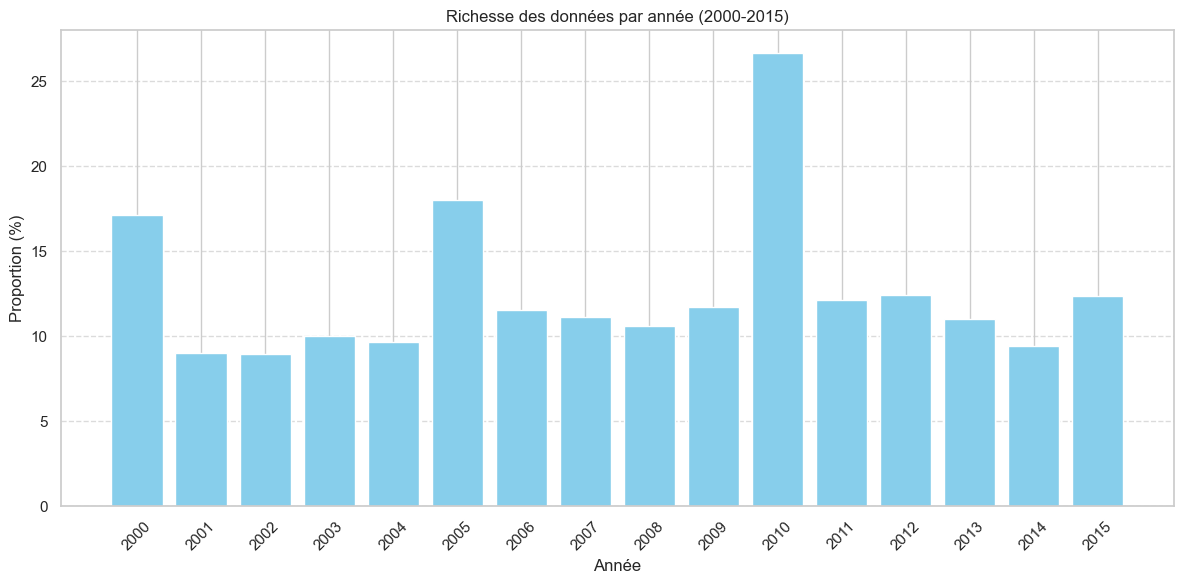

In [35]:
# Identification des colonnes
colonnes_non_annees = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
colonnes_annees = [str(annee) for annee in range(2000, 2016)]  # 2000 à 2015 inclus

# Initialisation
richesse_par_annee = {}
total_indicateurs = df_data_pertinent.shape[0]

# Calcul de la richesse par année
for annee in colonnes_annees:
    # Compter les valeurs non-nulles pour l'année donnée
    valeurs_non_nulles = df_data_pertinent[annee].count()
    
    # Calcul du pourcentage de richesse
    richesse = (valeurs_non_nulles / total_indicateurs) * 100
    
    # Stockage du résultat
    richesse_par_annee[annee] = {
        'nb_indicateurs_remplis': valeurs_non_nulles,
        'proportion_pct': richesse
    }

# Affichage des résultats
print("\nRichesse des données par année (2000-2015) :")
for annee, stats in richesse_par_annee.items():
    print(f"  {annee} : {stats['nb_indicateurs_remplis']} indicateurs remplis "
          f"({stats['proportion_pct']:.1f}%)")

# Analyse statistique des données
richesse = pd.Series({annee: stats['proportion_pct'] for annee, stats in richesse_par_annee.items()})
print("\nStatistiques descriptives de la richesse des données (2000-2015) :")
print(richesse.describe().round(2))
print("")

# Visualisation de la richesse des données par année
plt.figure(figsize=(12, 6))
plt.bar(richesse_par_annee.keys(), 
        [stats['proportion_pct'] for stats in richesse_par_annee.values()],
        color='skyblue')
plt.title('Richesse des données par année (2000-2015)')
plt.xlabel('Année')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
print(f"\nIdentification des années les plus/moins riches")
print("")

# Tri par ordre décroissant de richesse

richesse_triee = richesse.sort_values(ascending=False)

print("Top 5 des années les plus riches en données :")
for i, (annee, proportion) in enumerate(richesse_triee.head(5).items(), 1):
    nb_rempli = richesse_par_annee[annee]['nb_indicateurs_remplis']
    print(f"  {i}. {annee} : {proportion:.2f}% ({nb_rempli:,} indicateurs)")

print("\nTop 5 des années les moins riches en données :")
for i, (annee, proportion) in enumerate(richesse_triee.tail(5).items(), 1):
    nb_rempli = richesse_par_annee[annee]['nb_indicateurs_remplis']
    print(f"  {i}. {annee} : {proportion:.2f}% ({nb_rempli:,} indicateurs)")


print("")


Identification des années les plus/moins riches

Top 5 des années les plus riches en données :
  1. 2010 : 26.66% (177,025 indicateurs)
  2. 2005 : 18.01% (119,558 indicateurs)
  3. 2000 : 17.10% (113,572 indicateurs)
  4. 2012 : 12.41% (82,387 indicateurs)
  5. 2015 : 12.36% (82,082 indicateurs)

Top 5 des années les moins riches en données :
  1. 2003 : 10.02% (66,529 indicateurs)
  2. 2004 : 9.64% (64,000 indicateurs)
  3. 2014 : 9.45% (62,737 indicateurs)
  4. 2001 : 8.99% (59,694 indicateurs)
  5. 2002 : 8.95% (59,451 indicateurs)



In [37]:
# Créer un DataFrame récapitulatif
df_richesse_annees = pd.DataFrame.from_dict(richesse_par_annee, orient='index')
df_richesse_annees.index.name = 'Annee'
df_richesse_annees = df_richesse_annees.reset_index()

print("DataFrame de synthèse créé : df_richesse_annees")
print(f"Contient : {len(df_richesse_annees)} lignes (une par année)")
print("Colonnes : Annee, nb_indicateurs_remplis, proportion_pct")

DataFrame de synthèse créé : df_richesse_annees
Contient : 16 lignes (une par année)
Colonnes : Annee, nb_indicateurs_remplis, proportion_pct


In [38]:
df_richesse_annees.head()

,Annee,nb_indicateurs_remplis,proportion_pct
0,2000,113572,17.103702
1,2001,59694,8.989789
2,2002,59451,8.953194
3,2003,66529,10.019126
4,2004,64000,9.638264


In [39]:
df_counts = (
    df_data_pertinent
    .groupby('Indicator Name')[colonnes_annees]
    .count()
)

# Score global par indicateur (somme sur les années)
indicator_scores = df_counts.sum(axis=1)

# Top 15 indicateurs
top15 = indicator_scores.sort_values(ascending=False).head(15)
selected_indicators = top15.index.tolist()

# Affichage
print("Top 15 indicateurs sélectionnés  (nombre total de pays renseignés) :")
for i, ind in enumerate(selected_indicators, 1):
    print(f"{i:2d}. {ind} (score = {indicator_scores[ind]})")

Top 15 indicateurs sélectionnés  (nombre total de pays renseignés) :
 1. Theoretical duration of primary education (years) (score = 3328)
 2. Official entrance age to primary education (years) (score = 3328)
 3. Theoretical duration of upper secondary education (years) (score = 3278)
 4. Official entrance age to lower secondary education (years) (score = 3278)
 5. Theoretical duration of secondary education (years) (score = 3278)
 6. Theoretical duration of lower secondary education (years) (score = 3278)
 7. Official entrance age to upper secondary education (years) (score = 3259)
 8. Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number) (score = 2752)
 9. Enrolment in primary education, both sexes (number) (score = 2742)
10. Percentage of students in primary education who are female (%) (score = 2721)
11. Enrolment in primary education, female (number) (score = 2721)
12. Gross enrolment ratio, primary, both sexes (%) (score = 2622

* Forte présence d’indicateurs structurels (durée, âge d’entrée) : utiles pour des comparaisons de systèmes éducatifs.
* Bonne couverture des indicateurs de genre : tu pourras explorer les inégalités ou parités dans l’accès à l’éducation.
* Indicateurs quantitatifs et ratios : permettent des analyses statistiques robustes.

Top 15 indicateurs sélectionnés  (nombre total de pays renseignés) :
 1. Theoretical duration of primary education (years) (score = 3328)
 2. Official entrance age to primary education (years) (score = 3328)
 3. Theoretical duration of upper secondary education (years) (score = 3278)
 4. Official entrance age to lower secondary education (years) (score = 3278)
 5. Theoretical duration of secondary education (years) (score = 3278)
 6. Theoretical duration of lower secondary education (years) (score = 3278)
 7. Official entrance age to upper secondary education (years) (score = 3259)
 8. Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number) (score = 2752)
 9. Enrolment in primary education, both sexes (number) (score = 2742)
10. Percentage of students in primary education who are female (%) (score = 2721)
11. Enrolment in primary education, female (number) (score = 2721)
12. Gross enrolment ratio, primary, both sexes (%) (score = 2622)
13. Gross enrolment ratio, primary, male (%) (score = 2591)
14. Gross enrolment ratio, primary, female (%) (score = 2591)
15. Gross enrolment ratio, primary, gender parity index (GPI) (score = 2591)

In [40]:
df_data_pertinent = df_data_pertinent[
    df_data_pertinent['Indicator Name'].isin(selected_indicators)
].copy()

### Étape 3 : Consolidation des résultats dans un DataFrame (pays, indicateurs)

Je vais transformer notre DataFrame `df_data_pertinent`, actuellement (indicateur, année, pays), en un format consolidé où chaque ligne représente un pays et chaque colonne un indicateur.

#### Objectif :
- Filtrer les données selon les indicateurs sélectionnés
- Agréger les années pour chaque pays et indicateur
- Résumer les valeurs par pays en utilisant la **moyenne** comme statistique agrégée

Nous utiliserons `pivot_table()` pour cette opération.

In [41]:
df_long = df_data_pertinent.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='Value'
)

counts = df_long.groupby(['Country Name', 'Indicator Code'])['Value'].count()
print(f"\nNombre de lignes dans df_long : {df_long.shape[0]}")
print(f"Nombre de valeurs par (pays, indicateur) : {counts.describe().round(2)}\n")

# Création d'une table pivot
df_consolide = df_long.pivot_table(
    index='Country Name',
    columns='Indicator Name',
    values='Value',
    aggfunc='mean'
)



Nombre de lignes dans df_long : 52080
Nombre de valeurs par (pays, indicateur) : count    3255.00
mean       13.63
std         4.63
min         0.00
25%        14.00
50%        16.00
75%        16.00
max        16.00
Name: Value, dtype: float64



La DataFrame `df_long` contient 52 080 lignes, chacune représentant une observation (pays, indicateur, année, valeur).

* La majorité des couples (pays, indicateur),75 %, disposent de données pour 16 années, soit l’intégralité de la période étudiée.
* Un quart des couples a manqué au moins 2 années de données.
* Certains couples n’ont aucune donnée (min = 0), ce qui peut produire des moyennes manquantes dans la pivot table.

Je décide de supprimer les données disposant moins de 10 années.

In [42]:
# Étape 1 : calcul du nombre de valeurs non-nulles par série (pays, indicateur)
valid_counts = df_long.groupby(['Country Name', 'Indicator Code'])['Value'].transform('count')
n_avant = df_long.shape[0]

# Étape 2 : suppression des lignes appartenant à des séries incomplètes (< 16 valeurs)
df_long = df_long[valid_counts == 16].copy()

# Étape 3 (optionnel) : contrôle
n_apres = df_long.shape[0]
print(f"Lignes avant filtrage : {n_avant}")
print(f"Lignes après filtrage : {n_apres}")
print(f"Réduction : {n_avant - n_apres} lignes supprimées")

Lignes avant filtrage : 52080
Lignes après filtrage : 31680
Réduction : 20400 lignes supprimées


In [43]:
counts = df_long.groupby(['Country Name', 'Indicator Code'])['Value'].count()
print(f"\nNombre de lignes dans df_long : {df_long.shape[0]}")
print(f"Nombre de valeurs par (pays, indicateur) : {counts.describe().round(2)}\n")


Nombre de lignes dans df_long : 31680
Nombre de valeurs par (pays, indicateur) : count    1980.0
mean       16.0
std         0.0
min        16.0
25%        16.0
50%        16.0
75%        16.0
max        16.0
Name: Value, dtype: float64



In [44]:
# Création d'une table pivot
df_consolide = df_long.pivot_table(
    index='Country Name',
    columns='Indicator Name',
    values='Value',
    aggfunc='mean'
)

In [45]:
df_consolide.shape

(208, 14)

## **Exercice 3**

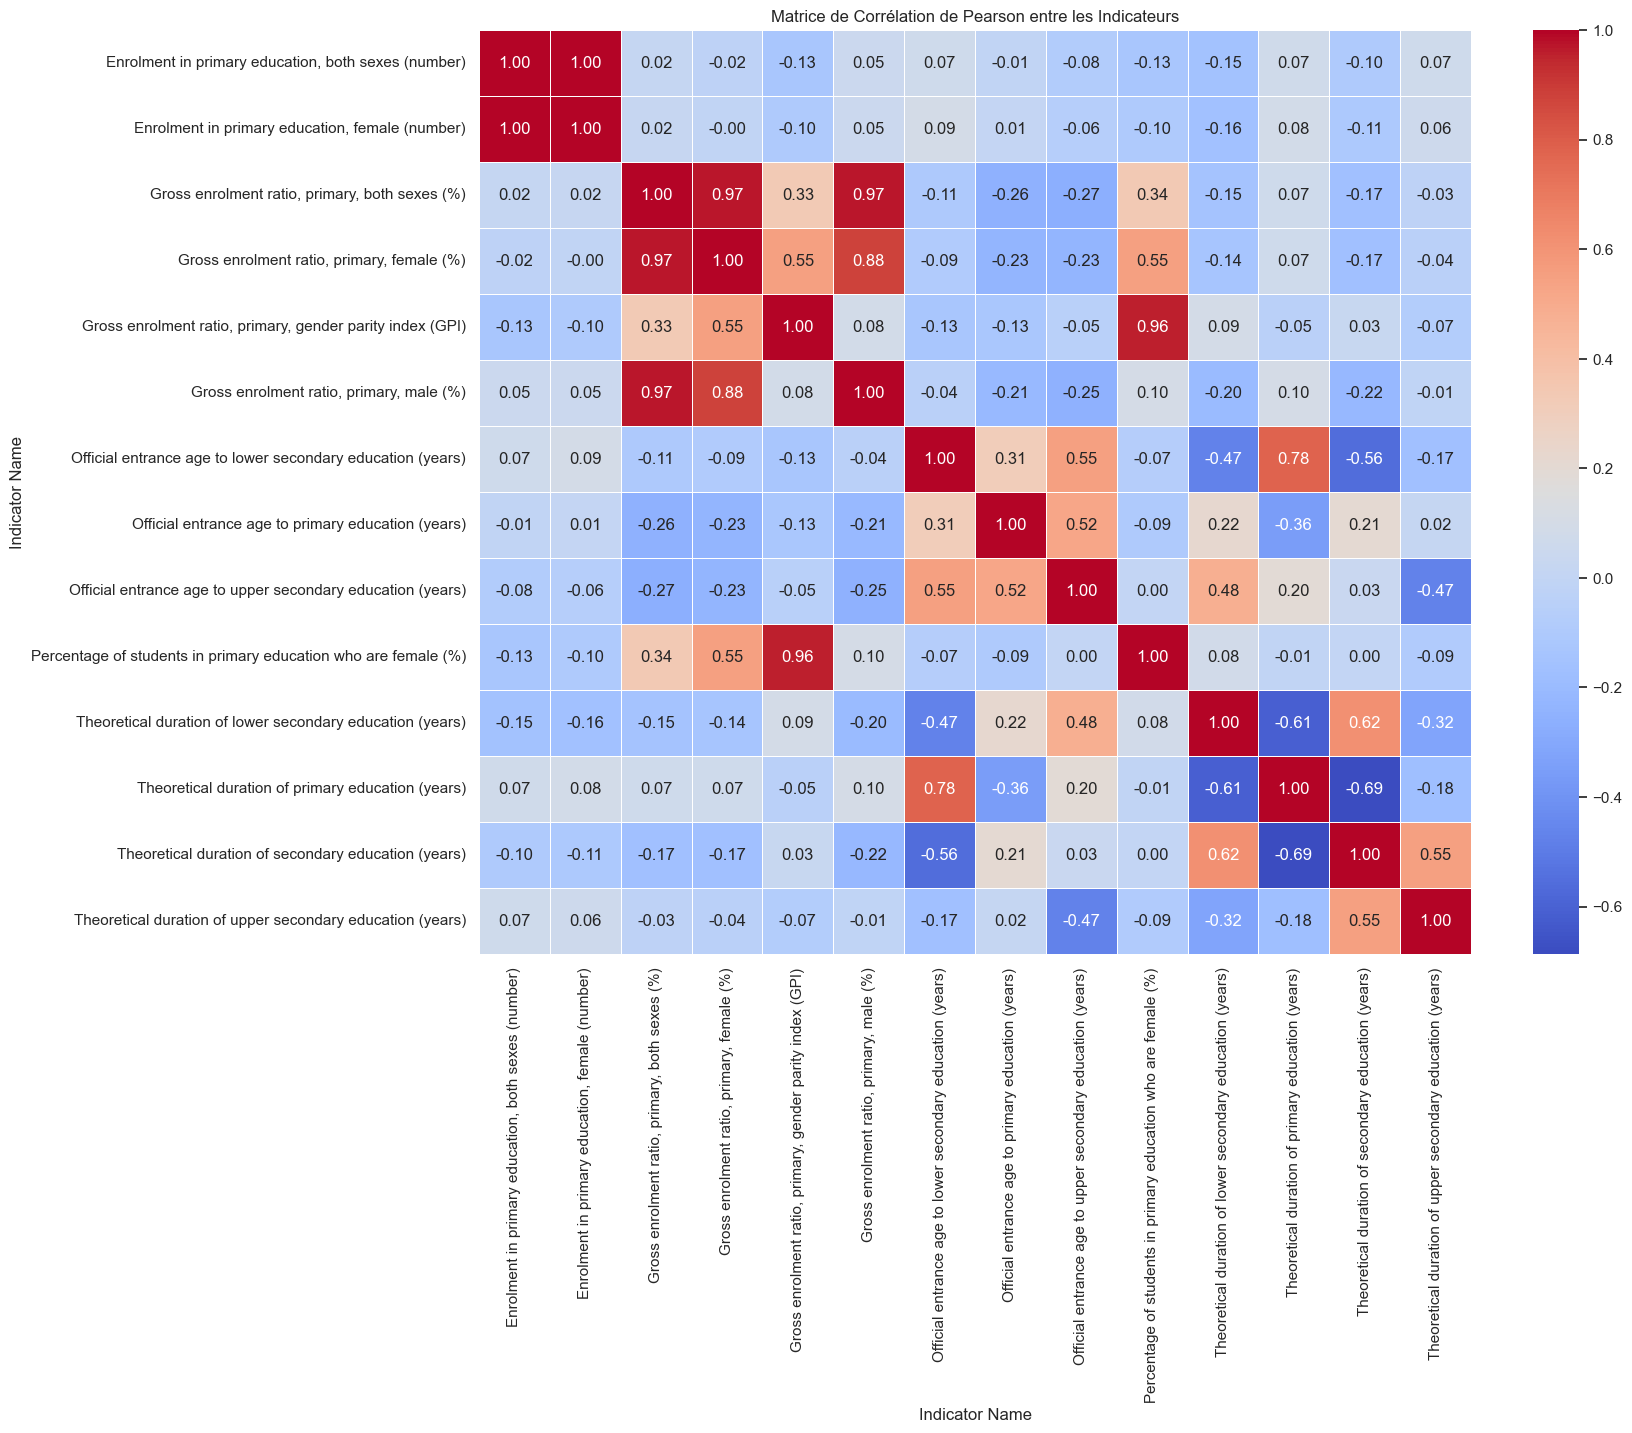

In [46]:
# 1. Calcul de la matrice de corrélation de Pearson
# La méthode de Pearson mesure la corrélation linéaire entre les variables.
# Elle est sensible aux relations linéaires et aux distributions normales.
correlation_pearson = df_consolide.corr(method='pearson')

# 2. Visualisation de la matrice de corrélation de Pearson avec une heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation de Pearson entre les Indicateurs')
plt.show()


Matrice de Corrélation de Spearman (premières lignes) :
 Indicator Name                                      Enrolment in primary education, both sexes (number)  Enrolment in primary education, female (number)  \
Indicator Name                                                                                                                                             
Enrolment in primary education, both sexes (num...                                           1.000000                                           0.998961   
Enrolment in primary education, female (number)                                              0.998961                                           1.000000   
Gross enrolment ratio, primary, both sexes (%)                                               0.124297                                           0.147055   
Gross enrolment ratio, primary, female (%)                                                   0.102731                                           0.114623   
Gross 

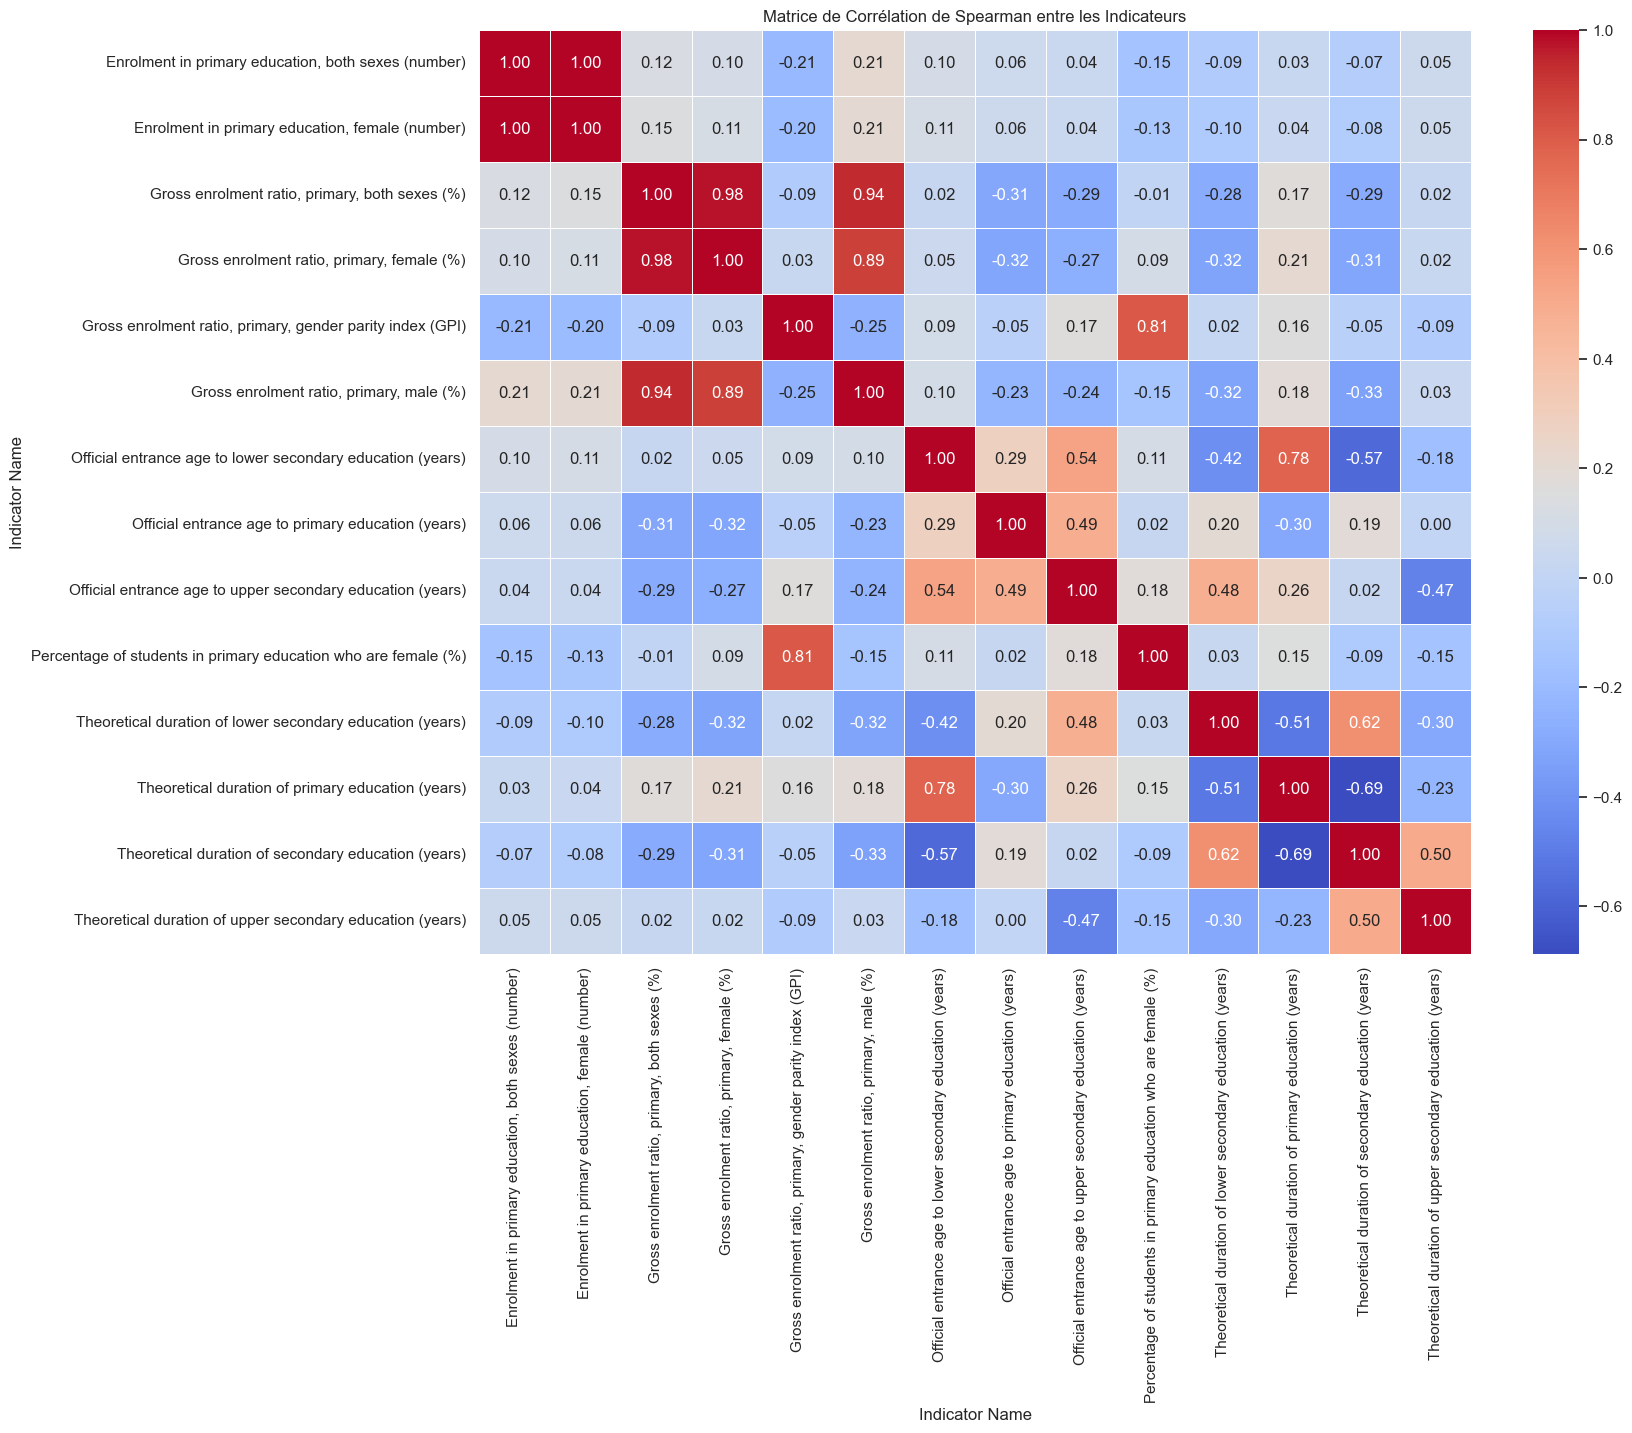

In [47]:
# 3. Calcul de la matrice de corrélation de Spearman
# La méthode de Spearman mesure la corrélation monotone (non nécessairement linéaire)
# entre les variables. Elle est basée sur les rangs des données et est plus robuste
# aux valeurs aberrantes et aux distributions non normales.
correlation_spearman = df_consolide.corr(method='spearman')
print("\nMatrice de Corrélation de Spearman (premières lignes) :\n", correlation_spearman.head())

# 4. Visualisation de la matrice de corrélation de Spearman avec une heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation de Spearman entre les Indicateurs')
plt.show()

In [48]:
print("\n--- Identification et Suppression des Indicateurs Redondants ---")

# Seuil de corrélation pour la suppression des indicateurs redondants
# L'énoncé suggère un seuil de 70% (0.7 en valeur absolue).
seuil_correlation = 0.7

# Nous allons utiliser la matrice de Pearson pour la suppression
# Ici, nous allons identifier les paires d'indicateurs fortement corrélés et en supprimer un.

indicateurs_a_supprimer = set()

# Parcourir la matrice de corrélation (uniquement la moitié supérieure pour éviter les doublons et la diagonale)
# Nous itérons sur les colonnes pour identifier les paires.
for i in range(len(correlation_pearson.columns)):
    for j in range(i + 1, len(correlation_pearson.columns)):
        ind_i = correlation_pearson.columns[i]
        ind_j = correlation_pearson.columns[j]

        # Vérifier si l'un des indicateurs a déjà été marqué pour suppression
        if ind_i in indicateurs_a_supprimer or ind_j in indicateurs_a_supprimer:
            continue

        # Calculer la valeur absolue de la corrélation
        corr_value = abs(correlation_pearson.loc[ind_i, ind_j])

        # Si la corrélation est supérieure au seuil, marquer un indicateur pour suppression
        if corr_value >= seuil_correlation:
            print(f"Corrélation élevée entre '{ind_i}' et '{ind_j}': {corr_value:.2f}")
            # Décision simple : supprimer le second indicateur rencontré dans la paire.
            # Dans un cas réel, vous pourriez vouloir une logique plus sophistiquée
            # (ex: garder l'indicateur le plus complet, le plus facile à interpréter, etc.)
            indicateurs_a_supprimer.add(ind_j)
            print(f"'{ind_j}' marqué pour suppression.")

# Créer un nouveau DataFrame sans les indicateurs redondants
df_consolide_filtre = df_consolide.drop(columns=list(indicateurs_a_supprimer))

print(f"\nNombre d'indicateurs avant suppression : {df_consolide.shape[1]}")
print(f"Nombre d'indicateurs après suppression : {df_consolide_filtre.shape[1]}")
print("\nIndicateurs supprimés :", list(indicateurs_a_supprimer))
print("\nNouveau DataFrame consolidé avec indicateurs filtrés (premières lignes) :")
print(df_consolide_filtre.head())


--- Identification et Suppression des Indicateurs Redondants ---
Corrélation élevée entre 'Enrolment in primary education, both sexes (number)' et 'Enrolment in primary education, female (number)': 1.00
'Enrolment in primary education, female (number)' marqué pour suppression.
Corrélation élevée entre 'Gross enrolment ratio, primary, both sexes (%)' et 'Gross enrolment ratio, primary, female (%)': 0.97
'Gross enrolment ratio, primary, female (%)' marqué pour suppression.
Corrélation élevée entre 'Gross enrolment ratio, primary, both sexes (%)' et 'Gross enrolment ratio, primary, male (%)': 0.97
'Gross enrolment ratio, primary, male (%)' marqué pour suppression.
Corrélation élevée entre 'Gross enrolment ratio, primary, gender parity index (GPI)' et 'Percentage of students in primary education who are female (%)': 0.96
'Percentage of students in primary education who are female (%)' marqué pour suppression.
Corrélation élevée entre 'Official entrance age to lower secondary education (ye


--- Nouvelle Matrice de Corrélation (Pearson) après Filtrage ---


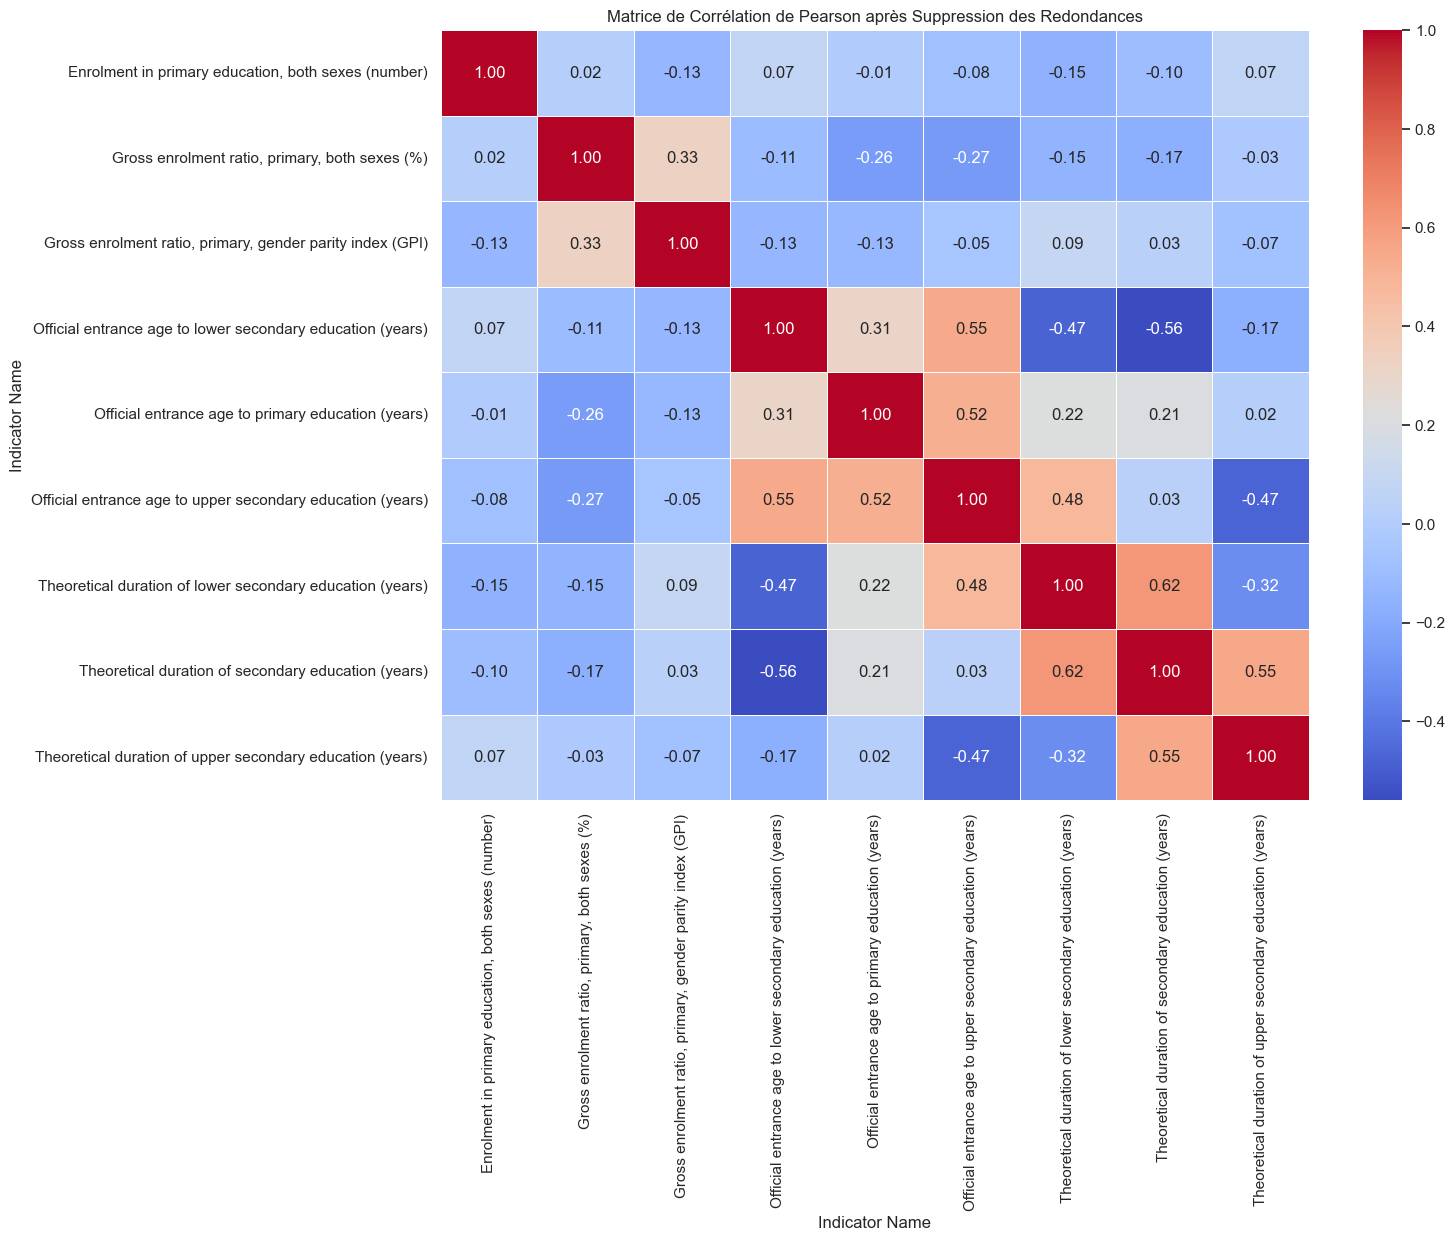

In [49]:
# Vérifier la nouvelle matrice de corrélation pour les indicateurs restants
print("\n--- Nouvelle Matrice de Corrélation (Pearson) après Filtrage ---")
correlation_filtre = df_consolide_filtre.corr(method='pearson')
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_filtre, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation de Pearson après Suppression des Redondances')
plt.show()

Après avoir calculé les matrices de corrélation de Pearson et de Spearman, nous avons procédé à l'élimination des indicateurs présentant une forte redondance statistique.

Le seuil de corrélation absolue a été fixé à 0.7. Les indicateurs suivants ont été identifiés comme fortement corrélés et ont été supprimés de notre jeu de données consolidé :

- `Enrolment in primary education, female (number)` (Corrélation de 1.00 avec `Enrolment in primary education, both sexes (number)`) : Il est logique que le nombre d'élèves de sexe féminin soit parfaitement corrélé au nombre total d'élèves dans l'enseignement primaire. Le maintien de l'indicateur "both sexes" est suffisant pour représenter cette information.

- `Gross enrolment ratio, primary, female (%)` (Corrélation de 0.97 avec `Gross enrolment ratio, primary, both sexes (%)`)

- `Gross enrolment ratio, primary, male (%)` (Corrélation de 0.97 avec `Gross enrolment ratio, primary, both sexes (%)`) : Les taux bruts de scolarisation pour les filles et les garçons sont très fortement corrélés au taux global. L'indicateur "both sexes" capture l'information principale, et l'indice de parité des genres (`Gross enrolment ratio, primary, gender parity index (GPI)`) permet d'analyser la répartition entre les sexes de manière plus nuancée sans redondance directe sur les taux.

- `Theoretical duration of primary education (years)` (Corrélation de 0.78 avec `Official entrance age to lower secondary education (years)`) : La durée théorique de l'enseignement primaire est fortement liée à l'âge d'entrée au collège. L'âge d'entrée au collège peut être une information plus directe pour évaluer la structure du système éducatif.

- `Percentage of students in primary education who are female (%)` (Corrélation de 0.96 avec `Gross enrolment ratio, primary, gender parity index (GPI)`) : Ces deux indicateurs mesurent des aspects très similaires de la parité des genres dans l'enseignement primaire. Le GPI est un indicateur standardisé et souvent préféré pour cette analyse.

En conséquence de ce filtrage, le nombre d'indicateurs est passé de 14 à 9, ce qui simplifie le jeu de données tout en conservant les informations les plus distinctes et pertinentes. La nouvelle matrice de corrélation des indicateurs restants montre des corrélations généralement plus faibles, ce qui indique que nous avons réduit la redondance et que chaque indicateur restant apporte une contribution plus unique à notre analyse.

**Voici la liste des indicateurs que nous retenons dans le dataframe `df_consolide_filtre` pour la suite :**
* Enrolment in primary education, both sexes (number)
* Gross enrolment ratio, primary, both sexes (%)
* Gross enrolment ratio, primary, gender parity index (GPI)
* Official entrance age to lower secondary education (years)
* Official entrance age to primary education (years)
* Official entrance age to upper secondary education (years)
* Theoretical duration of lower secondary education (years)
* Theoretical duration of secondary education (years)
* Theoretical duration of upper secondary education (years)

In [50]:
# --- 1. Analyse Univariée Approfondie des Indicateurs Filtrés ---

print("\n1. Statistiques Descriptives des Indicateurs Filtrés :")
# Calcul des statistiques descriptives pour chaque indicateur restant.
# Cela inclut la moyenne, l'écart-type, les valeurs min/max, les quartiles.
# Ces statistiques aident à comprendre la distribution et l'étendue des valeurs.
stats_descriptives = df_consolide_filtre.describe().transpose()
print(stats_descriptives)


1. Statistiques Descriptives des Indicateurs Filtrés :
                                                    count          mean           std          min            25%            50%           75%           max
Indicator Name                                                                                                                                              
Enrolment in primary education, both sexes (num...   83.0  2.220083e+06  4.659438e+06  9045.312500  270141.125000  681067.687500  2.132830e+06  2.956769e+07
Gross enrolment ratio, primary, both sexes (%)       77.0  1.023892e+02  1.284883e+01    54.935665      99.951441     102.828298  1.074720e+02  1.335647e+02
Gross enrolment ratio, primary, gender parity i...   75.0  9.673903e-01  6.787510e-02     0.551322       0.967585       0.989731  9.982328e-01  1.025271e+00
Official entrance age to lower secondary educat...  204.0  1.181464e+01  8.409861e-01    10.000000      11.000000      12.000000  1.200000e+01  1.400000e+01
Of

`Enrolment in primary education, both sexes (number) :`
- Avec une moyenne de 2.2 millions et un écart-type de 4.6 millions, cet indicateur présente une très forte variabilité.
- La médiane (50%) est de 681 067, ce qui est bien inférieur à la moyenne, et le maximum est de 29.5 millions. Cela suggère une distribution fortement asymétrique, avec une poignée de pays ayant un très grand nombre d'élèves du primaire. Cela indique qu'il y a une grande diversité de marchés potentiels, des petits aux très grands.

`Gross enrolment ratio, primary, both sexes (%) :`
- La moyenne de 102.39% est supérieure à 100%, ce qui est un point positif. Cela signifie qu'en moyenne, il y a plus d'élèves inscrits dans l'enseignement primaire que le nombre d'enfants de la tranche d'âge officielle. Cela peut être dû à l'inclusion d'élèves plus jeunes ou plus âgés que l'âge officiel.
- L'écart-type est relativement faible (12.85), indiquant que la plupart des pays se regroupent autour de cette moyenne, avec des valeurs généralement élevées. Le minimum est de 54.94%, ce qui pourrait être un critère d'exclusion pour la start-up si elle cible des marchés déjà bien établis.

`Gross enrolment ratio, primary, gender parity index (GPI) :`
- Avec une moyenne de 0.97 et une médiane de 0.99, cet indicateur montre une très bonne parité entre les genres dans l'enseignement primaire à travers les pays.
- La plupart des pays ont un GPI proche de 1.0, ce qui est un excellent signal pour une start-up EdTech, car cela suggère que le marché cible n'a pas à se concentrer sur des problématiques de disparité de genre majeures. Le minimum de 0.55 met en évidence quelques exceptions qui pourraient être des marchés à éviter.

`Official entrance age to primary education (years) :`
- La moyenne et la médiane sont très proches de 6 ans, avec un faible écart-type de 0.56. Cela indique que l'âge d'entrée au primaire est très standardisé à 6 ans dans la grande majorité des pays. C'est une information cruciale pour concevoir des produits adaptés.

`Durée et Âge d'entrée aux autres niveaux d'éducation :`
- Les indicateurs comme Official entrance age to lower secondary education (years) (âge médian de 12 ans), Official entrance age to upper secondary education (years) (âge médian de 15 ans), et les durées théoriques des cycles (Theoretical duration of lower secondary education (years) avec une médiane de 3 ans) montrent des structures éducatives globalement cohérentes et standardisées. Ces informations sont utiles pour déterminer le positionnement de la start-up, que ce soit pour le primaire, le secondaire inférieur ou supérieur.


2. Visualisation des Distributions des Indicateurs Filtrés :


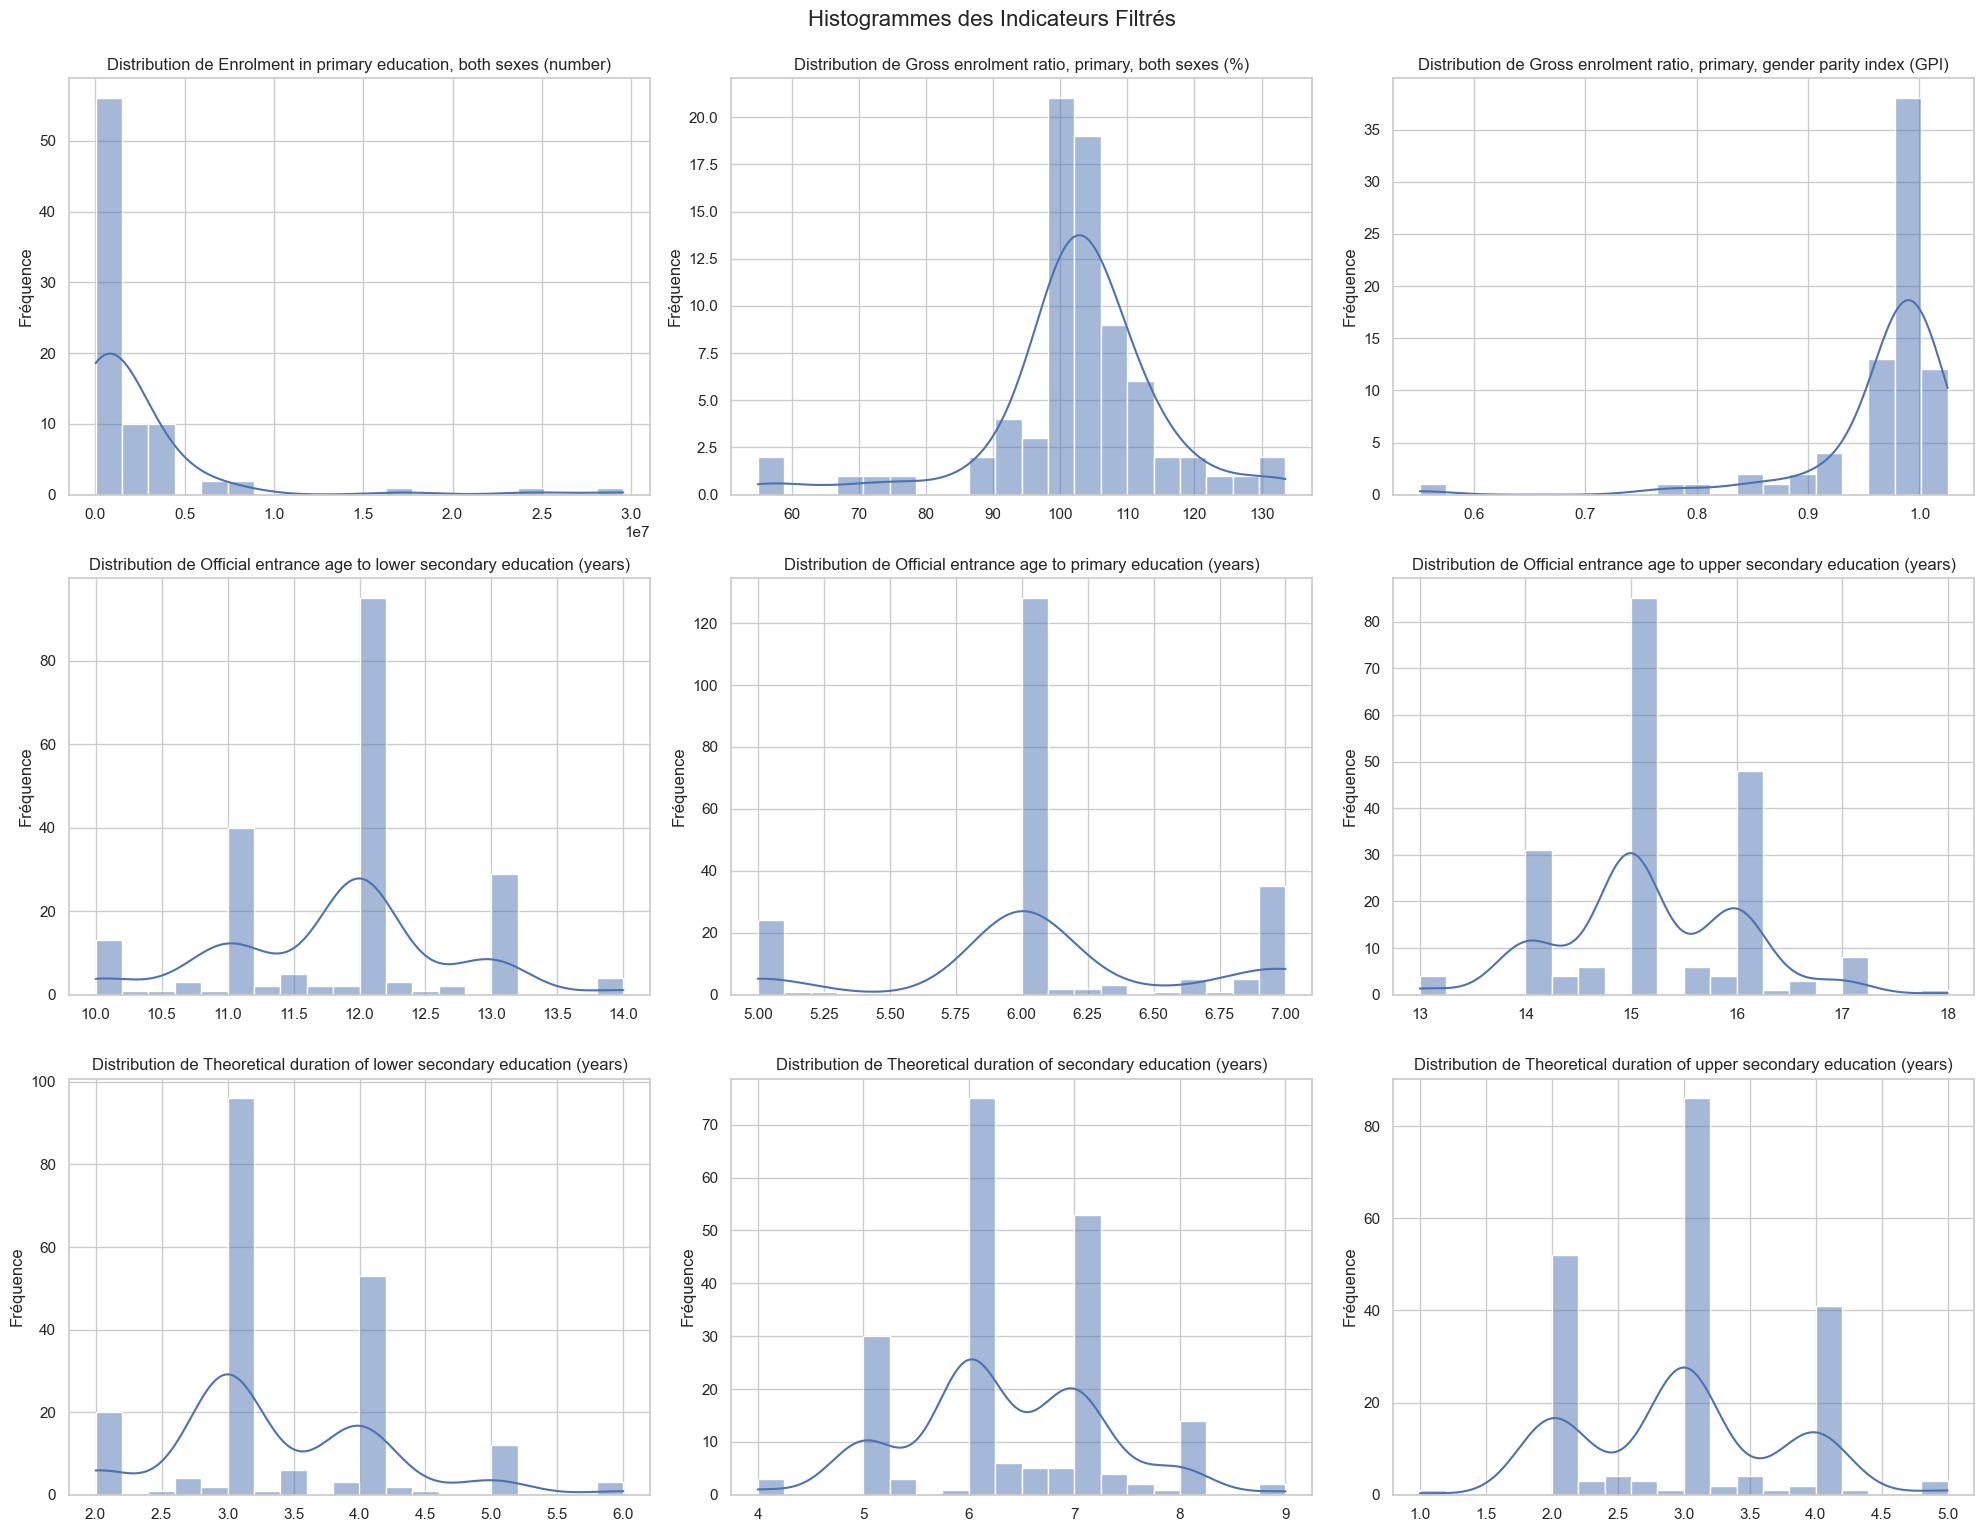

In [51]:
print("\n2. Visualisation des Distributions des Indicateurs Filtrés :")

# Création d'histogrammes pour visualiser la distribution de chaque indicateur.
# Les histogrammes montrent la fréquence des valeurs dans différentes plages.
# Cela aide à identifier la forme de la distribution (normale, asymétrique, etc.),
# les valeurs typiques et la présence de valeurs aberrantes.
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_consolide_filtre.columns):
    plt.subplot(3, 3, i + 1) # Ajustez la grille (3,3) si vous avez plus/moins de 9 indicateurs
    sns.histplot(df_consolide_filtre[column].dropna(), kde=True, bins=20)
    plt.title(f'Distribution de {column}')
    plt.xlabel('') # Supprimer l'étiquette de l'axe X pour éviter la surcharge
    plt.ylabel('Fréquence')
plt.tight_layout()
plt.suptitle('Histogrammes des Indicateurs Filtrés', y=1.02, fontsize=16)
plt.show()

Les visualisations confirment les observations de l'analyse descriptive et nous donnent une image plus claire de la répartition des pays selon chaque indicateur.

`Enrolment in primary education, both sexes (number) :` L'histogramme montre une distribution fortement asymétrique, concentrée vers la gauche. Cela signifie qu'un grand nombre de pays ont un faible nombre d'élèves du primaire, tandis que quelques pays se distinguent avec une population d'élèves massive. Ce constat est en accord avec le fait que la moyenne est significativement plus élevée que la médiane, ce qui est typique des distributions asymétriques.

`Gross enrolment ratio, primary, both sexes (%) :` La distribution est relativement concentrée autour de 100%, comme l'indiquait la moyenne. On observe une légère asymétrie vers la droite, avec quelques pays dépassant largement les 100%. Cela peut correspondre aux pays où il y a un grand nombre d'élèves en dehors de la tranche d'âge officielle.

`Gross enrolment ratio, primary, gender parity index (GPI) :` L'histogramme est clairement concentré autour de 1.0, ce qui visuellement confirme la bonne parité des genres dans la plupart des pays. On note une petite queue à gauche, ce qui représente les quelques pays avec une parité plus faible.

`Official entrance age to primary education (years) :` La distribution est très serrée autour de 6 ans, avec une grande majorité de pays. Les valeurs de 5 et 7 ans sont également présentes mais moins fréquentes, ce qui montre une forte standardisation de l'âge d'entrée au primaire.

`Official entrance age to lower/upper secondary education (years)` & `Theoretical duration of lower/upper secondary education (years) :` Pour ces indicateurs, les histogrammes montrent des distributions avec plusieurs pics (multimodales) qui se concentrent sur des valeurs entières (par exemple, 11, 12, 13 pour l'âge d'entrée au secondaire inférieur). Cela est tout à fait normal et attendu, car l'âge d'entrée et la durée des cycles éducatifs sont souvent des valeurs entières qui varient selon les systèmes éducatifs des différents pays.

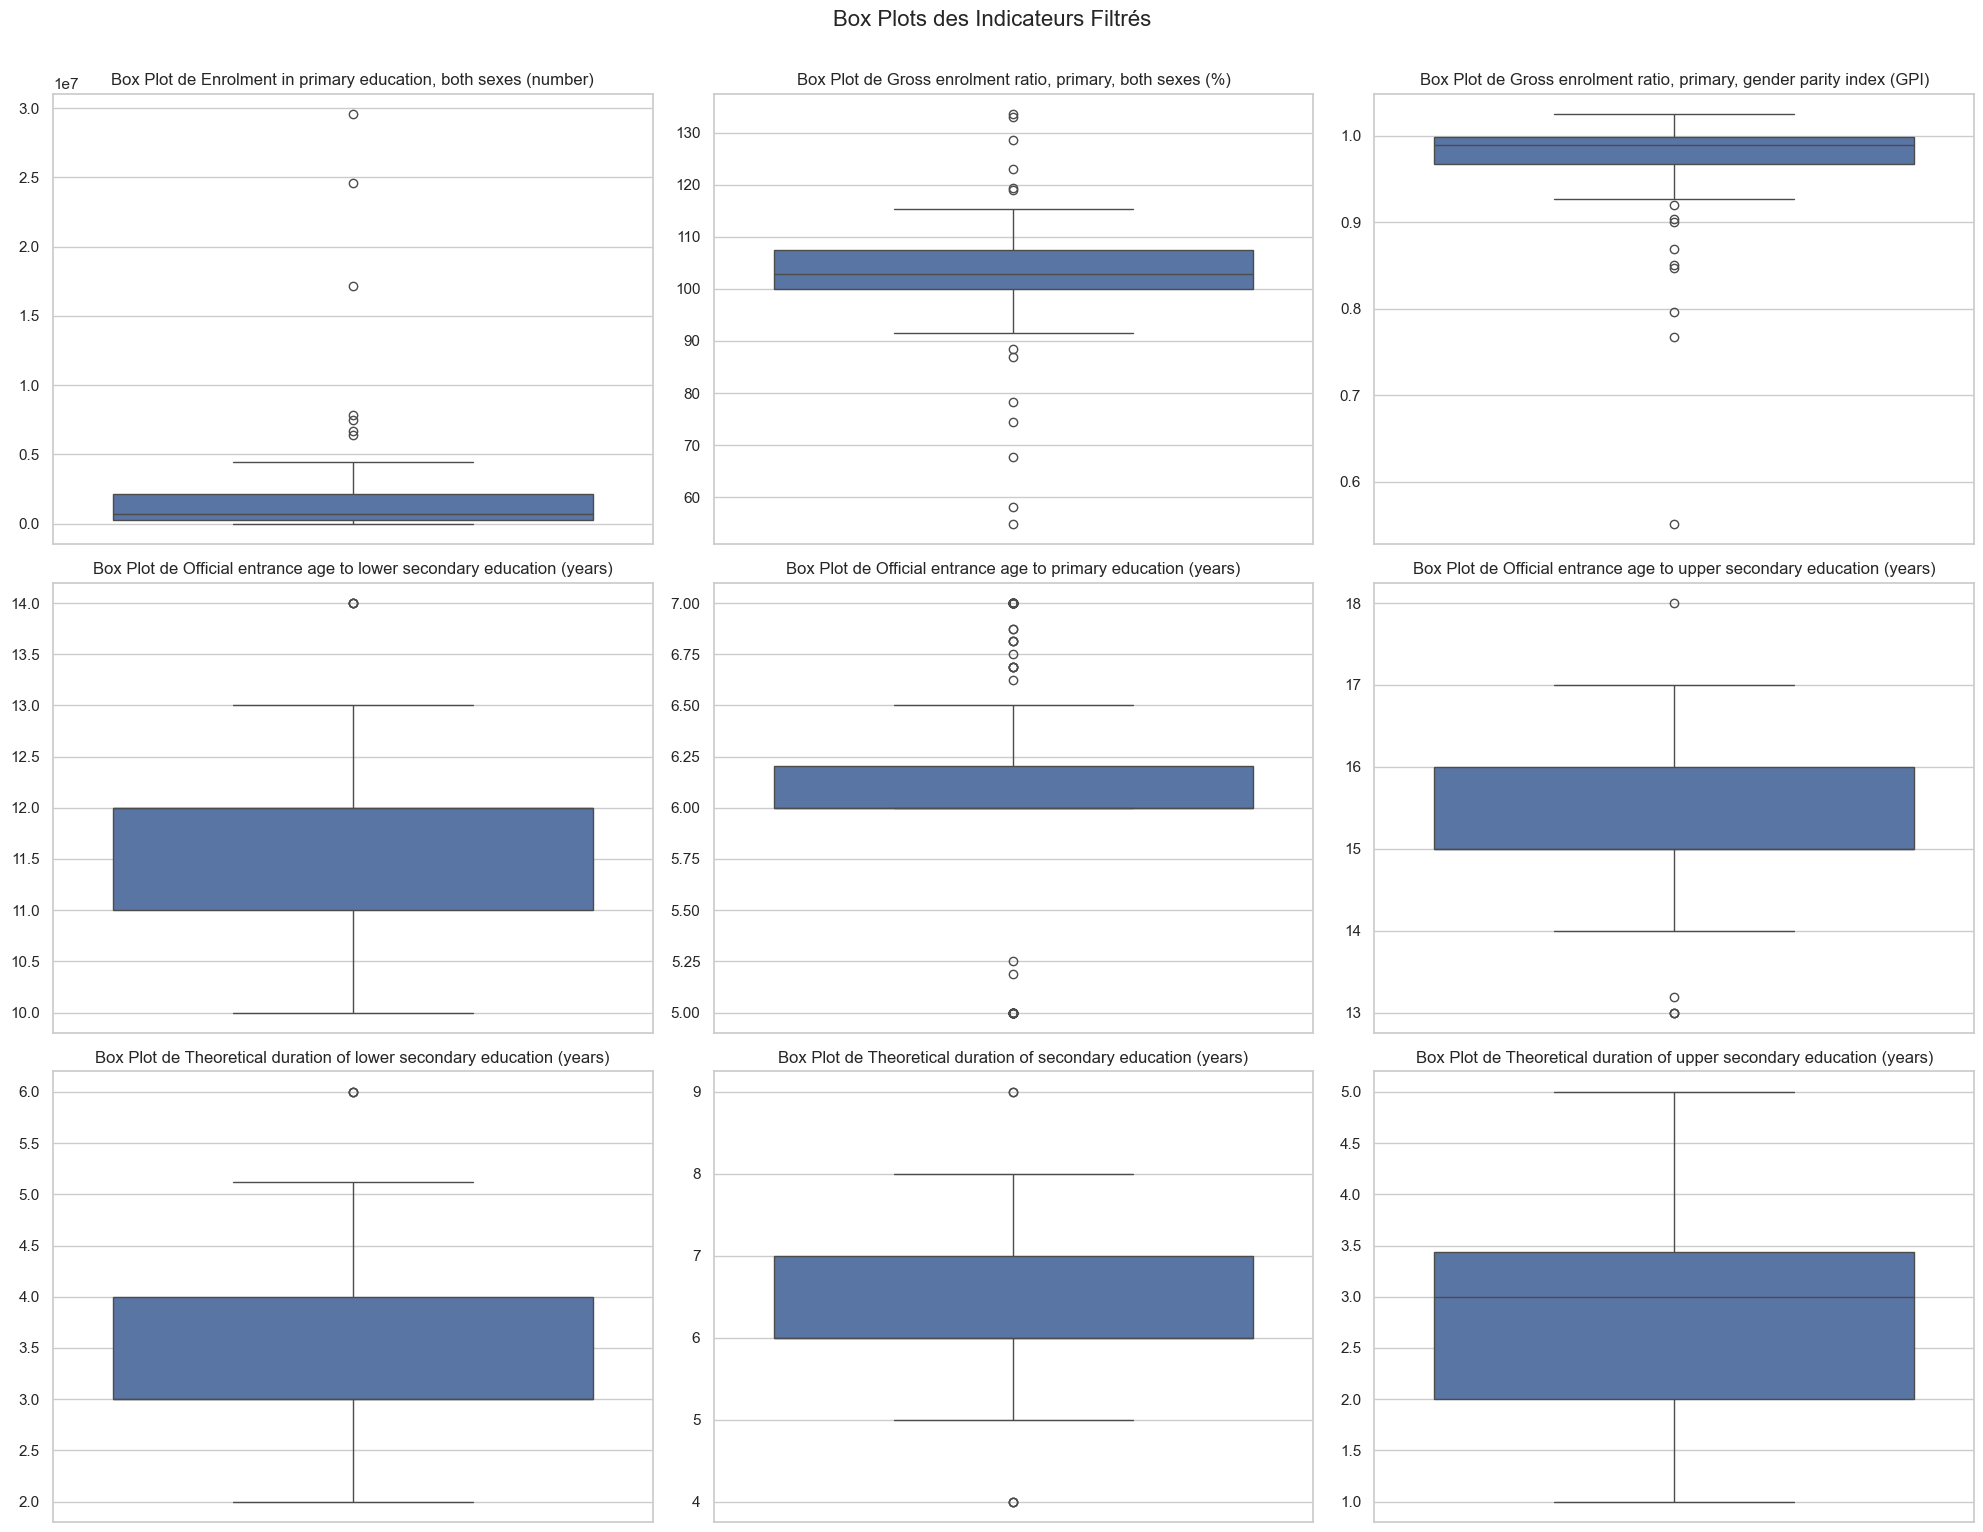

In [52]:
# Création de boîtes à moustaches (box plots) pour visualiser la distribution et les valeurs aberrantes.
# Les box plots montrent la médiane, les quartiles (IQR) et les valeurs aberrantes (points individuels).
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_consolide_filtre.columns):
    plt.subplot(3, 3, i + 1) # Ajustez la grille (3,3) si vous avez plus/moins de 9 indicateurs
    sns.boxplot(y=df_consolide_filtre[column].dropna())
    plt.title(f'Box Plot de {column}')
    plt.ylabel('') # Supprimer l'étiquette de l'axe Y pour éviter la surcharge
plt.tight_layout()
plt.suptitle('Box Plots des Indicateurs Filtrés', y=1.02, fontsize=16)
plt.show()

Les box plots confirment la grande variabilité des marchés en termes de taille, la bonne santé globale des taux de scolarisation et de la parité, ainsi que la standardisation des âges d'entrée. L'identification des valeurs aberrantes est particulièrement utile ici, car elle peut nous aider à repérer des marchés atypiques qui pourraient être soit une opportunité, soit un risque pour notre expansion.

In [53]:
# Définition des poids des indicateurs
poids_indicateurs = {
    # Priorité élevée aux indicateurs de participation et de parité
    'Gross enrolment ratio, primary, both sexes (%)': 0.3,
    'Gross enrolment ratio, primary, gender parity index (GPI)': 0.25,
    # Importance de la taille du marché
    'Enrolment in primary education, both sexes (number)': 0.2,
    # Autres indicateurs structurels
    'Official entrance age to primary education (years)': 0.1,
    'Official entrance age to lower secondary education (years)': 0.05,
    'Official entrance age to upper secondary education (years)': 0.05,
    'Theoretical duration of lower secondary education (years)': 0.025,
    'Theoretical duration of secondary education (years)': 0.0125,
    'Theoretical duration of upper secondary education (years)': 0.0125
}

# Vérification : somme des poids = 1.0
somme_poids = sum(poids_indicateurs.values())
print(f"Somme des poids : {somme_poids:.2f}")

Somme des poids : 1.00


In [54]:
# Normalisation des données
df_normalise = df_consolide_filtre.copy()
for column in df_consolide_filtre.columns:
    if column == 'Gross enrolment ratio, primary, gender parity index (GPI)':
        # Pour le GPI, le "meilleur" score est proche de 1.
        # Donc, nous calculons la distance à 1, puis inversons le score.
        # Plus un GPI est proche de 1, plus la distance est faible, plus le score final sera haut.
        df_normalise[column] = 1 - abs(df_normalise[column] - 1)
    else:
        # Pour les autres indicateurs, on normalise les valeurs brutes.
        min_val = df_normalise[column].min()
        max_val = df_normalise[column].max()
        if max_val - min_val > 0:
            df_normalise[column] = (df_normalise[column] - min_val) / (max_val - min_val)

# Remplir les valeurs manquantes après normalisation pour ne pas affecter le score final.
# On peut les remplir avec 0, car un manque de données n'est pas un bon signe.
df_normalise.fillna(0, inplace=True)

In [55]:
# Calcul du score pondéré pour chaque pays
# On multiplie chaque colonne normalisée par son poids respectif
# et on fait la somme de ces produits pour chaque pays.
df_normalise['Score Pondéré'] = 0
for column, poids in poids_indicateurs.items():
    if column in df_normalise.columns:
        df_normalise['Score Pondéré'] += df_normalise[column] * poids

In [60]:
# On trie le DataFrame par 'Score Pondéré' de manière descendante pour obtenir le top.
classement_pays = df_normalise.sort_values(by='Score Pondéré', ascending=False)

print("\nIndicateurs pour les 5 premiers pays du classement :")
display(df_consolide_filtre.loc[classement_pays.head(5).index])


Indicateurs pour les 5 premiers pays du classement :


Indicator Name,"Enrolment in primary education, both sexes (number)","Gross enrolment ratio, primary, both sexes (%)","Gross enrolment ratio, primary, gender parity index (GPI)",Official entrance age to lower secondary education (years),Official entrance age to primary education (years),Official entrance age to upper secondary education (years),Theoretical duration of lower secondary education (years),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years)
Country Name,,,,,,,,,
Indonesia,2.956769e+07,108.075836,0.986148,13.0,7.0,16.0,3.0,6.0,3.0
Rwanda,2.037597e+06,132.996083,1.011800,13.0,7.0,16.0,3.0,6.0,3.0
United States,2.462570e+07,101.041431,0.998497,12.0,6.0,15.0,3.0,6.0,3.0
Madagascar,3.714480e+06,133.564679,0.973343,11.0,6.0,15.0,4.0,7.0,3.0
El Salvador,9.446257e+05,118.903444,0.961736,13.0,7.0,16.0,3.0,6.0,3.0


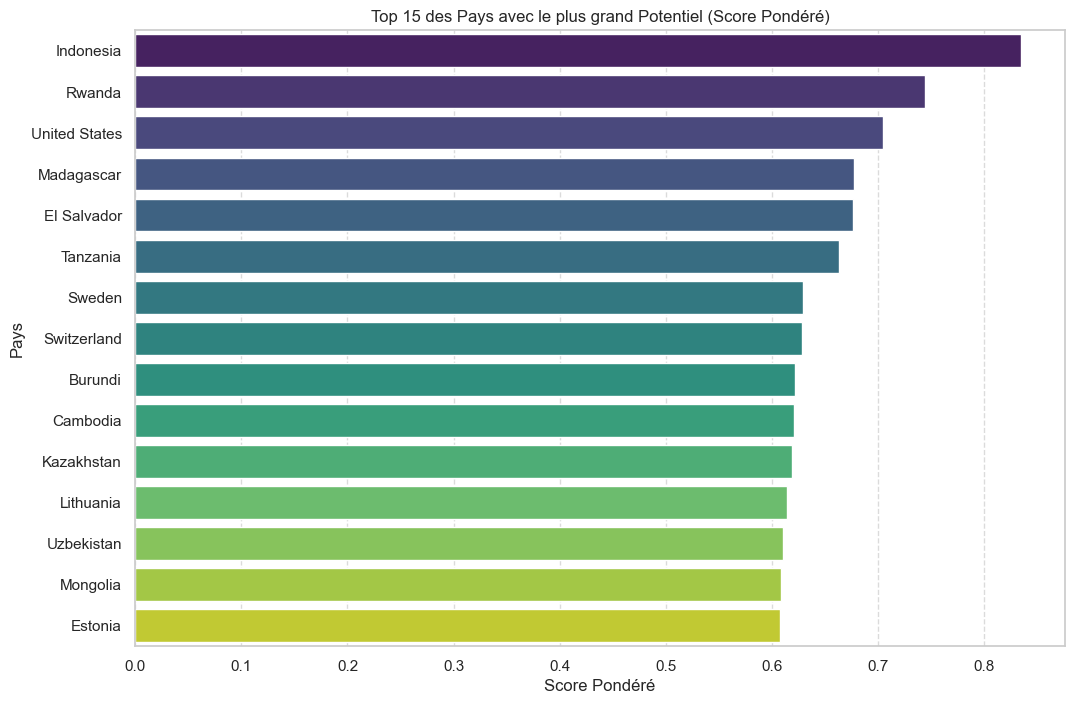

In [63]:
# Visualisation sous forme de bar plot pour une meilleure lisibilité.
plt.figure(figsize=(12, 8))
sns.barplot(
    data=classement_pays.head(15).reset_index(),
    x='Score Pondéré',
    y='Country Name',
    palette='viridis'
)
plt.title('Top 15 des Pays avec le plus grand Potentiel (Score Pondéré)')
plt.xlabel('Score Pondéré')
plt.ylabel('Pays')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

L'analyse des données suggère une stratégie d'expansion différenciée pour "academy". Il est recommandé de cibler un portefeuille de pays qui offrent des opportunités complémentaires.

1. Priorité aux marchés massifs : 
L'Indonésie et les États-Unis représentent des marchés idéaux pour une croissance rapide en raison de leur grande population d'élèves. Leurs systèmes éducatifs sont matures, stables et présentent une forte parité des genres.

2. Explorer les marchés en croissance : 
Des pays comme le Rwanda et Madagascar, avec leurs taux de scolarisation très élevés, sont d'excellents "laboratoires" pour tester de nouveaux modèles et fonctionnalités. Ils offrent un potentiel de croissance à long terme malgré une taille de marché plus modeste.

3. Diversifier pour mitiger les risques : 
Une expansion progressive vers des pays comme la Lituanie, l'Estonie et le Kazakhstan diversifierait les sources de revenus. Cette approche permettrait à "academy" de réduire sa dépendance à quelques grands marchés et de se positionner sur diverses cultures éducatives.

En résumé, la meilleure approche est de cibler un mélange de marchés massifs (Indonésie, États-Unis) et de marchés prometteurs (Rwanda) pour allier croissance rapide et impact stratégique.